# Importando as bibliotecas

In [75]:
import mlflow
import mlflow.sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.base import BaseEstimator, TransformerMixin
from feature_engine import encoding as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, validation_curve
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score, roc_auc_score, auc, balanced_accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

from scipy.stats import ks_2samp

from xgboost import XGBClassifier
import inspect

In [7]:
from pandas_profiling import ProfileReport

# Lendo os dados

Features e contexto

* ```ID```: Identificação do cliente  
* ```Genero```: Gênero do cliente  
* ```PlanoFidelidade```: Se o cliente possui ou não o plano fidelidade da BoraBusão  
* ```Idade```: Idade do cliente  
* ```RazaoViagem```: Motivo da viagem ( pessoal ou a trabalho? )  
* ```CategoriaPassagem```: Em qual catergoria ele está viajando? Normal, Comforto ou Leito  
* ```DistanciaKm```: A distancia do trecho de viagem  
* ```WiFi```: Possui WiFi no ônibus, o serviço está bom?  
* ```ConvenienciaHorarios```: Os horários de partida e chagada são convenientes?  
* ```FacilidadeReservaViaApp```: Nível de facilidade de fazer a reserva da passagem  
* ```PontosLocalização```: A localização dos pontos de ônibus é boa, qual a satisfação com relação a esse ponto  
* ```Alimentação```: A alimentação servida no oninbus e nos pontos, qual a sua avaliação?  
* ```CheckInViaApp```: Facilidade de fazer o checkIn via o app  
* ```ConfortoInterno```: Nível de conforto do ônibus ( cadeiras, ar-condicionado)  
* ```ServicosIntegracao```: Nível de satisfação desde a chegada até o embarque.  
* ```SalaDeEspera```: Nível de satisfação com a sala de espera de quem tem o plano Fidelidade  
* ```Bagagem```: Nível de satisfação com o serviço e manuseamento da bagagem do passageiro  
* ```ServicoCheckin```: Nivel de satisfaçao com o serviço de checkin local  
* ```ServicoDeBordo```: Nível de satisfação com o serviço de bordo  
* ```Limpeza```: Nível de satisfação com a Limpeza  
* ```AtrasoNaSaída```: Atraso em minutos na partida  
* ```AtrasoNaChegada```: Atraso em minuto na chegada  
* ```SatisfacaoGeral```: Variável alvo, o cliente está satisfeito ou não  

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df_borabusao = pd.read_csv('BoraBusTratado.csv')
df_borabusao

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
0,70172,Masculino,Sim,13,TurismoOuPessoal,Comforto,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Nao
1,5047,Masculino,Nao,25,NegociosOuTrabalho,Leito,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Nao
2,110028,Feminino,Sim,26,NegociosOuTrabalho,Leito,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Sim
3,24026,Feminino,Sim,25,NegociosOuTrabalho,Leito,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Nao
4,119299,Masculino,Sim,61,NegociosOuTrabalho,Leito,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Feminino,Nao,23,NegociosOuTrabalho,Normal,120.0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,Nao
103900,73097,Masculino,Sim,49,NegociosOuTrabalho,Leito,1467.0,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,Sim
103901,68825,Masculino,Nao,30,NegociosOuTrabalho,Leito,1247.0,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,Nao
103902,54173,Feminino,Nao,22,NegociosOuTrabalho,Normal,625.0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,Nao


In [10]:
df_borabusao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       103904 non-null  int64  
 1   Genero                   103904 non-null  object 
 2   PlanoFidelidade          103904 non-null  object 
 3   Idade                    103904 non-null  int64  
 4   RazaoViagem              103904 non-null  object 
 5   CategoriaPassagem        103904 non-null  object 
 6   DistanciaKm              103904 non-null  float64
 7   WiFi                     103904 non-null  int64  
 8   ConvenienciaHorarios     103904 non-null  int64  
 9   FacilidadeReservaViaApp  103904 non-null  int64  
 10  PontosLocalizacao        103904 non-null  int64  
 11  Alimentacao              103904 non-null  int64  
 12  CheckInViaApp            103904 non-null  int64  
 13  ConfortoInterno          103904 non-null  int64  
 14  Entr

Considerações:
* O dataset apresenta vlores nulos.
* Possui variáveis categóricas e numéricas.

In [11]:
df_borabusao['SatisfacaoGeral'].value_counts()

Nao    58879
Sim    45025
Name: SatisfacaoGeral, dtype: int64

In [12]:
df_borabusao.describe()

,ID,Idade,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,743.397415,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,623.222871,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,259.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,527.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1089.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,3114.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data manipulation

In [13]:
df_encoded = df_borabusao.copy()
df_encoded

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada,SatisfacaoGeral
0,70172,Masculino,Sim,13,TurismoOuPessoal,Comforto,288.0,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,Nao
1,5047,Masculino,Nao,25,NegociosOuTrabalho,Leito,147.0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,Nao
2,110028,Feminino,Sim,26,NegociosOuTrabalho,Leito,714.0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,Sim
3,24026,Feminino,Sim,25,NegociosOuTrabalho,Leito,351.0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,Nao
4,119299,Masculino,Sim,61,NegociosOuTrabalho,Leito,134.0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Feminino,Nao,23,NegociosOuTrabalho,Normal,120.0,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,Nao
103900,73097,Masculino,Sim,49,NegociosOuTrabalho,Leito,1467.0,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,Sim
103901,68825,Masculino,Nao,30,NegociosOuTrabalho,Leito,1247.0,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,Nao
103902,54173,Feminino,Nao,22,NegociosOuTrabalho,Normal,625.0,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,Nao


In [14]:
df_borabusao.isnull().sum()

ID                           0
Genero                       0
PlanoFidelidade              0
Idade                        0
RazaoViagem                  0
CategoriaPassagem            0
DistanciaKm                  0
WiFi                         0
ConvenienciaHorarios         0
FacilidadeReservaViaApp      0
PontosLocalizacao            0
Alimentacao                  0
CheckInViaApp                0
ConfortoInterno              0
Entretenimento               0
ServicosIntegracao           0
SalaDeEspera                 0
Bagagem                      0
ServicoCheckIn               0
ServicoDeBordo               0
Limpeza&Higiene              0
AtrasoNaSaida                0
AtrasoNaChegada            310
SatisfacaoGeral              0
dtype: int64

In [15]:
class DeletaColunas(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns=None):       
        self.columns = columns
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.columns:
            #se existir seleciona as colunas
            #aplica a transformação
            X = X.drop(self.columns, axis = 1)       
        
        return X

In [19]:
def train_model(model, **params):
    
    # Transforma a target em [0, 1]:
    df_borabusao_transf = df_borabusao.copy()
    label_enc = LabelEncoder()
    df_borabusao_transf['SatisfacaoGeral'] = label_enc.fit_transform(df_borabusao_transf['SatisfacaoGeral'])

    # Faz a divisão entre treino, teste e validação:
    X = df_borabusao_transf.drop('SatisfacaoGeral', axis=1)
    y = df_borabusao_transf['SatisfacaoGeral']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


    # Construção dos pipelines
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                              ('oh_enc', ce.OneHotEncoder())])

    numerical_transformer = Pipeline(steps=[('delete_id', DeletaColunas('ID')),
                                            ('imputer', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])

    preprocess_pipeline = ColumnTransformer(transformers=[('num', numerical_transformer, make_column_selector(dtype_exclude='object')),
                                                          ('cat', categorical_transformer, make_column_selector(dtype_include='object'))], remainder='drop')

    if 'random_state' in inspect.signature(model).parameters:
        model_pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                                     ('model', model(**params, random_state=42))])
    else:
        model_pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                                     ('model', model(**params))])


    # Treino, predição e metricas:
    model_pipe.fit(X_train, y_train)

    predictions_train = model_pipe.predict(X_train)
    predictions_test = model_pipe.predict(X_test)

    acuracia_train = accuracy_score(y_train, predictions_train)
    acuracia_test = accuracy_score(y_test, predictions_test)
    roc_score_train = roc_auc_score(y_train, predictions_train, average='weighted')
    roc_score_teste = roc_auc_score(y_test, predictions_test, average='weighted')


    ks_score = ks_2samp(y_test, predictions_test)


    model_name = str(model).split('.')[-1].split("'")[0]
    print(f'Performance {model_name}:')
    print(f'Acurácia de treino: {round(acuracia_train*100, 2)}%')
    print(f'Acurácia de teste: {round(acuracia_test*100, 2)}%')
    print(f'ROC_AUC_SCORE de treino: {round(roc_score_train*100, 2)}%')
    print(f'ROC_AUC_SCORE de teste: {round(roc_score_teste*100, 2)}%')
    print(f'KS_score de teste: {ks_score}')
    print('---------------------------------------')
    print('Classification Report:\n')
    print(classification_report(y_test, predictions_test))

    RocCurveDisplay.from_estimator(model_pipe, X_test, y_test)

Performance LogisticRegression:
Acurácia de treino: 87.46%
Acurácia de teste: 87.66%
ROC_AUC_SCORE de treino: 86.99%
ROC_AUC_SCORE de teste: 87.23%
KS_score de teste: KstestResult(statistic=0.017275395794235093, pvalue=0.004004974519394489)
---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89     11713
           1       0.87      0.84      0.86      9068

    accuracy                           0.88     20781
   macro avg       0.88      0.87      0.87     20781
weighted avg       0.88      0.88      0.88     20781



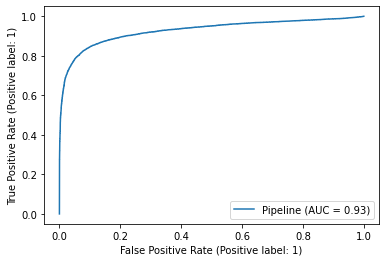

In [20]:
train_model(LogisticRegression)

Performance DecisionTreeClassifier:
Acurácia de treino: 100.0%
Acurácia de teste: 94.83%
ROC_AUC_SCORE de treino: 100.0%
ROC_AUC_SCORE de teste: 94.75%
KS_score de teste: KstestResult(statistic=0.0004330879168471524, pvalue=1.0)
---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



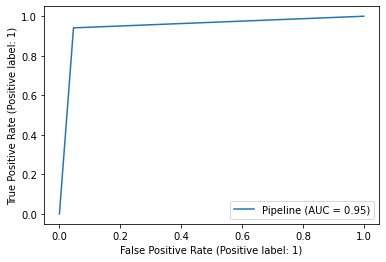

In [21]:
train_model(DecisionTreeClassifier)

Performance KNeighborsClassifier:
Acurácia de treino: 94.82%
Acurácia de teste: 92.94%
ROC_AUC_SCORE de treino: 94.42%
ROC_AUC_SCORE de teste: 92.46%
KS_score de teste: KstestResult(statistic=0.028343198113661483, pvalue=1.1011754293675581e-07)
---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11713
           1       0.95      0.89      0.92      9068

    accuracy                           0.93     20781
   macro avg       0.93      0.92      0.93     20781
weighted avg       0.93      0.93      0.93     20781



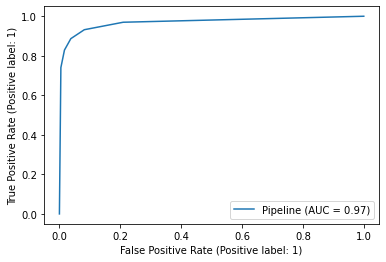

In [22]:
train_model(KNeighborsClassifier)

Performance RandomForestClassifier:
Acurácia de treino: 100.0%
Acurácia de teste: 96.32%
ROC_AUC_SCORE de treino: 100.0%
ROC_AUC_SCORE de teste: 96.06%
KS_score de teste: KstestResult(statistic=0.015446802367547252, pvalue=0.013905189235414998)
---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



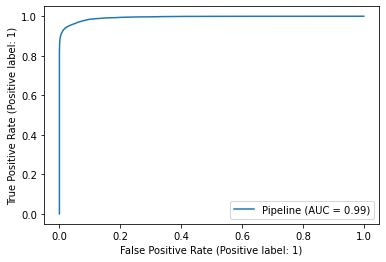

In [23]:
train_model(RandomForestClassifier)

Performance XGBClassifier:
Acurácia de treino: 97.67%
Acurácia de teste: 96.28%
ROC_AUC_SCORE de treino: 97.48%
ROC_AUC_SCORE de teste: 96.06%
KS_score de teste: KstestResult(statistic=0.011933978153120584, pvalue=0.10285248179281825)
---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



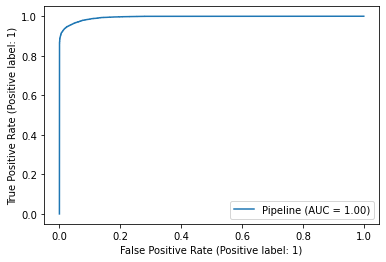

In [24]:
train_model(XGBClassifier)

Performance MLPClassifier:
Acurácia de treino: 97.22%
Acurácia de teste: 95.71%
ROC_AUC_SCORE de treino: 97.08%
ROC_AUC_SCORE de teste: 95.54%
KS_score de teste: KstestResult(statistic=0.007699340743948846, pvalue=0.5663656882086279)
---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11713
           1       0.96      0.94      0.95      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



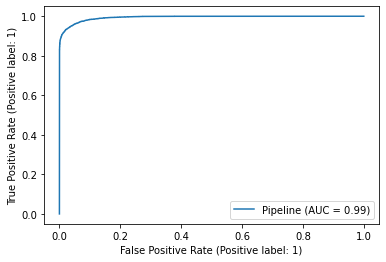

In [25]:
train_model(MLPClassifier, max_iter=500)

Performance SVC:
Acurácia de treino: 95.69%
Acurácia de teste: 95.32%
ROC_AUC_SCORE de treino: 95.45%
ROC_AUC_SCORE de teste: 95.08%
KS_score de teste: KstestResult(statistic=0.012896395746114231, pvalue=0.06256164418458066)
---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11713
           1       0.96      0.93      0.95      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



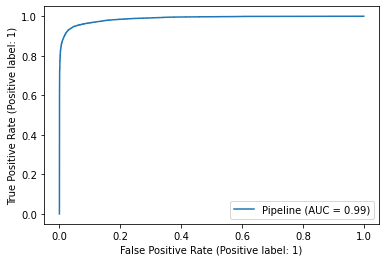

In [26]:
train_model(SVC)

# Grid Search para os melhores modelos

In [27]:
num_cols = [var for var in df_borabusao.columns if df_borabusao[var].dtype!='O' and var!='SatisfacaoGeral']
cat_cols = [var for var in df_borabusao.columns if df_borabusao[var].dtype=='O' and var!='SatisfacaoGeral']

In [ ]:
def grid_search_model(model, params):
    
    # Transforma a target em [0, 1]:
    df_borabusao_transf = df_borabusao.copy()
    label_enc = LabelEncoder()
    df_borabusao_transf['SatisfacaoGeral'] = label_enc.fit_transform(df_borabusao_transf['SatisfacaoGeral'])

    # Faz a divisão entre treino, teste e validação:
    X = df_borabusao_transf.drop('SatisfacaoGeral', axis=1)
    y = df_borabusao_transf['SatisfacaoGeral']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Construção dos pipelines
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                              ('ord_enc', ce.OneHotEncoder())])

    numerical_transformer = Pipeline(steps=[('delete_id', DeletaColunas('ID')),
                                            ('imputer', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])

    preprocess_pipeline = ColumnTransformer(transformers=[('num', numerical_transformer, num_cols),
                                                        ('cat', categorical_transformer, cat_cols)], remainder='drop')

    if 'random_state' in inspect.signature(model).parameters:
        model_pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                                     ('model', model(random_state=42))])
    else:
        model_pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                                     ('model', model())])


   # Grid search:
    # kfold = KFold(n_splits = 5, shuffle=True, random_state=42)
    grid = GridSearchCV(estimator=model_pipe, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True, verbose=10)

    # Treino, predição e métricas:
    grid.fit(X_train, y_train)

    gs_best_estimator = grid.best_estimator_
    gs_best_score_ = grid.best_score_
    gs_best_params = grid.best_params_

    # Printa melhores parâmetros do gridsearch
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",gs_best_estimator)
    print("\n The best score across ALL searched params:\n",gs_best_score_)
    print("\n The best parameters across ALL searched params:\n",gs_best_params)

    predictions_train = grid.predict(X_train)
    predictions_test = grid.predict(X_test)

    acuracia_train = accuracy_score(y_train, predictions_train)
    acuracia_test = accuracy_score(y_test, predictions_test)

    print('---------------------------------------')

    model_name = str(model).split('.')[-1].split("'")[0]
    print(f'Performance {model_name}:')
    print(f'Acurácia de treino: {round(acuracia_train*100, 2)}%')
    print(f'Acurácia de teste: {round(acuracia_test*100, 2)}%')
    print('---------------------------------------')
    print('Classification Report:\n')
    print(classification_report(y_test, predictions_test))

In [ ]:
params_XGBClf = {}
params_XGBClf['model__max_depth'] = range (2, 10, 1)
params_XGBClf['model__n_estimators'] = range(10, 220, 40)
params_XGBClf['model__learning_rate'] = [0.2, 0.1, 0.01, 0.05]
params_XGBClf['model__objective'] = ['binary:logistic'] 
params_XGBClf['model__nthread'] = [4]

In [ ]:
grid_search_model(XGBClassifier, params=params_XGBClf)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 2/5; 1/192] START model__learning_rate=0.2, model__max_depth=2, model__n_estimators=10, model__nthread=4, model__objective=binary:logistic
[CV 4/5; 1/192] START model__learning_rate=0.2, model__max_depth=2, model__n_estimators=10, model__nthread=4, model__objective=binary:logistic
[CV 5/5; 1/192] START model__learning_rate=0.2, model__max_depth=2, model__n_estimators=10, model__nthread=4, model__objective=binary:logistic
[CV 1/5; 1/192] START model__learning_rate=0.2, model__max_depth=2, model__n_estimators=10, model__nthread=4, model__objective=binary:logistic
[CV 1/5; 2/192] START model__learning_rate=0.2, model__max_depth=2, model__n_estimators=50, model__nthread=4, model__objective=binary:logistic
[CV 3/5; 1/192] START model__learning_rate=0.2, model__max_depth=2, model__n_estimators=10, model__nthread=4, model__objective=binary:logistic
[CV 2/5; 2/192] START model__learning_rate=0.2, model__max_depth=2, model__n_es

{'model__learning_rate': 0.1, 'model__max_depth': 8, 'model__n_estimators': 170, 'model__nthread': 4, 'model__objective': 'binary:logistic'}

In [28]:
def train_model_xgb(model):
    
    # Transforma a target em [0, 1]:
    df_borabusao_transf = df_borabusao.copy()
    label_enc = LabelEncoder()
    df_borabusao_transf['SatisfacaoGeral'] = label_enc.fit_transform(df_borabusao_transf['SatisfacaoGeral'])

    # Faz a divisão entre treino, teste e validação:
    X = df_borabusao_transf.drop('SatisfacaoGeral', axis=1)
    y = df_borabusao_transf['SatisfacaoGeral']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Construção dos pipelines
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                              ('oh_enc', ce.OneHotEncoder())])

    numerical_transformer = Pipeline(steps=[('delete_id', DeletaColunas('ID')),
                                            ('imputer', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])

    preprocess_pipeline = ColumnTransformer(transformers=[('num', numerical_transformer, num_cols),
                                                        ('cat', categorical_transformer, cat_cols)], remainder='drop')

    if 'random_state' in inspect.signature(model).parameters:
        model_pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                                     ('model', model(learning_rate = 0.1, max_depth = 8, n_estimators = 170,random_state=42))])
    else:
        model_pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                                     ('model', model(learning_rate = 0.1, max_depth = 8, n_estimators = 170))])


   # Grid search:
    # kfold = KFold(n_splits = 5, shuffle=True, random_state=42)
    # grid = GridSearchCV(estimator=model_pipe, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy', return_train_score=True, verbose=10)

    # Treino, predição e métricas:
    model_pipe.fit(X_train, y_train)

    # gs_best_estimator = grid.best_estimator_
    # gs_best_score_ = grid.best_score_
    # gs_best_params = grid.best_params_

    # # Printa melhores parâmetros do gridsearch
    # print(" Results from Grid Search " )
    # print("\n The best estimator across ALL searched params:\n",gs_best_estimator)
    # print("\n The best score across ALL searched params:\n",gs_best_score_)
    # print("\n The best parameters across ALL searched params:\n",gs_best_params)

    predictions_train = model_pipe.predict(X_train)
    predictions_test = model_pipe.predict(X_test)

    acuracia_train = accuracy_score(y_train, predictions_train)
    acuracia_test = accuracy_score(y_test, predictions_test)

    print('---------------------------------------')

    model_name = str(model).split('.')[-1].split("'")[0]
    print(f'Performance {model_name}:')
    print(f'Acurácia de treino: {round(acuracia_train*100, 2)}%')
    print(f'Acurácia de teste: {round(acuracia_test*100, 2)}%')
    print('---------------------------------------')
    print('Classification Report:\n')
    print(classification_report(y_test, predictions_test))

In [29]:
train_model_xgb(XGBClassifier)

---------------------------------------
Performance XGBClassifier:
Acurácia de treino: 97.97%
Acurácia de teste: 96.25%
---------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



Como a acurácia de teste da RandomForest foi melhor, irei escolhê-lo como modelo final:

In [30]:
params = {}
params["random_forest__n_estimators"]= [3, 10, 100, 500]
params["random_forest__max_depth"]= [2, 5, 50, 100]
params["random_forest__bootstrap"]= [True, False]
params["random_forest__min_samples_leaf"]= [2,5,7,20,50]

Após rodar um gridsearchCV, os parâmetros otimizados foram:  
  
```{'random_forest__bootstrap': False,  
    'random_forest__max_depth': 50,  
    'random_forest__min_samples_leaf': 2,  
    'random_forest__n_estimators': 500}

# Montagem modelo para experimentos:

## Divisão entre treino, teste e validação:

In [32]:
# Transforma a target em [0, 1]:
df_borabusao_transf = df_borabusao.copy()
label_enc = LabelEncoder()
df_borabusao_transf['SatisfacaoGeral'] = label_enc.fit_transform(df_borabusao_transf['SatisfacaoGeral'])

# Faz a divisão entre treino, teste e validação:
X = df_borabusao_transf.drop('SatisfacaoGeral', axis=1)
y = df_borabusao_transf['SatisfacaoGeral']
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

## Definição função do modelo

Pipeline:

In [77]:
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('oh_enc', ce.OneHotEncoder())])

numerical_transformer = Pipeline(steps=[('delete_id', DeletaColunas('ID')),
                                        ('imputer', SimpleImputer(strategy='median')),
                                        ('scaler', StandardScaler())])

preprocess_pipeline = ColumnTransformer(transformers=[('num', numerical_transformer,  make_column_selector(dtype_exclude='object')),
                                                      ('cat', categorical_transformer,  make_column_selector(dtype_include='object'))], remainder='drop')

RF_clf_pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                                ('random_forest', RandomForestClassifier(random_state=42))])

In [39]:
def train_model_RandomForest(n_estimators = 500,
                             max_depth = 50,
                             bootstrap = False,
                             min_samples_leaf = 2,
                             model_name = 'random-forest-model-pipeline'
                            ):
    mlflow.set_experiment('RF_model_pipeline_borabusao_')


    with mlflow.start_run(run_name=f'RF_model_experiment - n_estimators: {n_estimators}, - max_depth: {max_depth}, min_samples_leaf: {min_samples_leaf}'):    

        # Construção das pipelines
        categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                                ('oh_enc', ce.OneHotEncoder())])

        numerical_transformer = Pipeline(steps=[('delete_id', DeletaColunas('ID')),
                                                ('imputer', SimpleImputer(strategy='median')),
                                                ('scaler', StandardScaler())])

        preprocess_pipeline = ColumnTransformer(transformers=[('num', numerical_transformer,  make_column_selector(dtype_exclude='object')),
                                                            ('cat', categorical_transformer,  make_column_selector(dtype_include='object'))], remainder='drop')

        RF_clf_pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                                      ('random_forest', RandomForestClassifier(n_estimators=n_estimators,
                                                                            max_depth = max_depth,
                                                                            bootstrap= bootstrap,
                                                                            min_samples_leaf=min_samples_leaf,
                                                                            random_state=42))])


        # Treino:
        RF_clf_pipe.fit(X_train, y_train)

       # Logando hiper parametros
        
        mlflow.log_param('n_estimators', n_estimators)
        mlflow.log_param('max_depth', max_depth)
        mlflow.log_param('bootstrap', bootstrap)
        mlflow.log_param('random_forest__min_samples_leaf', min_samples_leaf) 

        # Predição
        predictions_train = RF_clf_pipe.predict(X_train)
        predictions_val = RF_clf_pipe.predict(X_val)


        # Metricas
        # Treino
        acuracia_train = accuracy_score(y_train, predictions_train)
        recall_train = recall_score(y_train, predictions_train, average = 'weighted' )
        precision_train = precision_score(y_train, predictions_train, average = 'weighted')
        f1_train = f1_score(y_train, predictions_train, average = 'weighted')
        roc_auc_train = roc_auc_score(y_train, predictions_train, average = 'weighted')
        b_acuracia_train = balanced_accuracy_score(y_train, predictions_train)

        
        # Validação
        acuracia_val = accuracy_score(y_val, predictions_val)
        recall_val = recall_score(y_val, predictions_val, average = 'weighted' )
        precision_val = precision_score(y_val, predictions_val, average = 'weighted')
        f1_val = f1_score(y_val, predictions_val, average = 'weighted')
        roc_auc_val = roc_auc_score(y_val, predictions_val, average = 'weighted')
        b_acuracia_val = balanced_accuracy_score(y_val, predictions_val)



        #Logando metricas
        # Treino
        mlflow.log_metric("acuracia_train",acuracia_train)
        mlflow.log_metric("acuracia_balanceada_train",b_acuracia_train)
        mlflow.log_metric("recall_train",recall_train)
        mlflow.log_metric("precision_train",precision_train)
        mlflow.log_metric("f1_train",f1_train)
        mlflow.log_metric("auc_score_train",roc_auc_train)
        # Validação
        mlflow.log_metric("acuracia_val",acuracia_val)
        mlflow.log_metric("acuracia_balanceada_val",b_acuracia_val)
        mlflow.log_metric("recall_val",recall_val)
        mlflow.log_metric("precision_val",precision_val)
        mlflow.log_metric("f1_val",f1_val)
        mlflow.log_metric("auc_score_val",roc_auc_val)
        

        
        #gráficos
        confusion = ConfusionMatrixDisplay.from_estimator(RF_clf_pipe, X_val, y_val)
        plt.savefig("confusionrf.png")
        roc = RocCurveDisplay.from_estimator(RF_clf_pipe, X_val, y_val)
        plt.savefig("rocrf.png")
        
        #logar gráficos
        mlflow.log_artifact("confusionrf.png")
        mlflow.log_artifact("rocrf.png") 
        
        
        #logando o modelo        
        mlflow.sklearn.log_model(RF_clf_pipe, model_name)
        
        mlflow.end_run()

    
    # print(f'Performance {model_name}:')
    # print(f'Acurácia de treino: {round(acuracia_train*100, 2)}%')
    # print(f'Acurácia de vale: {round(acuracia_val*100, 2)}%')
    # print('---------------------------------------')
    # print('Classification Report:\n')
    # print(classification_report(y_val, predictions_val))

In [34]:
params = {}
params["random_forest__n_estimators"]= [3, 10, 100, 250, 500]
params["random_forest__max_depth"]= [2, 5, 20, 50, 100]
params["random_forest__bootstrap"]= [True, False]
params["random_forest__min_samples_leaf"]= [2,5,20,50]

In [35]:
lst_random_forest__n_estimators = params['random_forest__n_estimators']
lst_random_forest__max_depth = params['random_forest__max_depth']
lst_random_forest__bootstrap = params['random_forest__bootstrap']
lst_random_forest__min_samples_leaf = params['random_forest__min_samples_leaf']

/Users/gabrielvarizo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_plot/confusion_matrix.py:129: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


KeyboardInterrupt: 

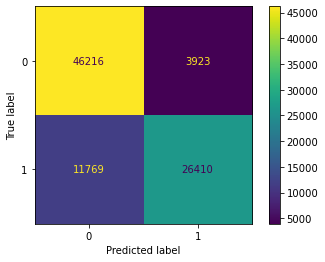

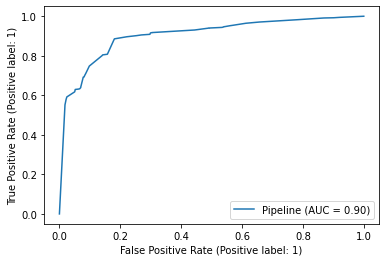

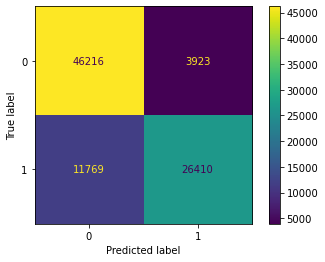

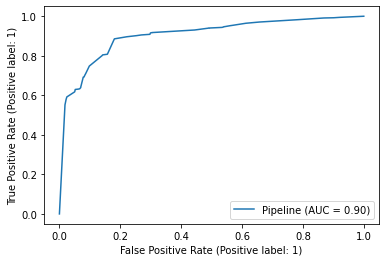

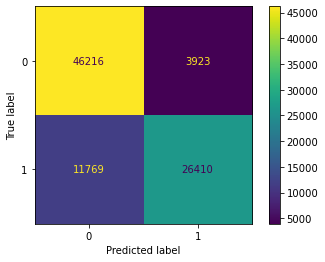

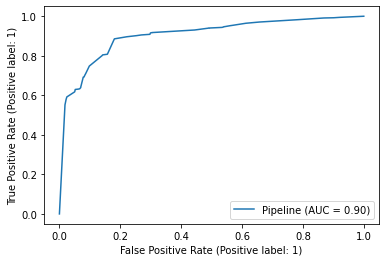

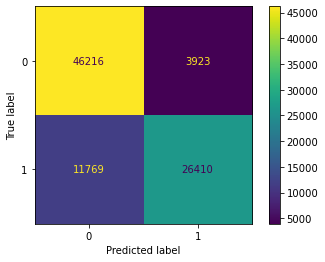

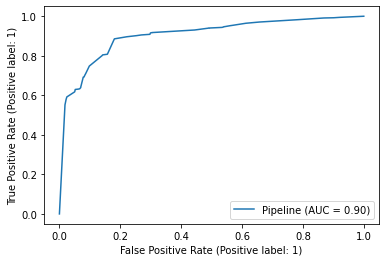

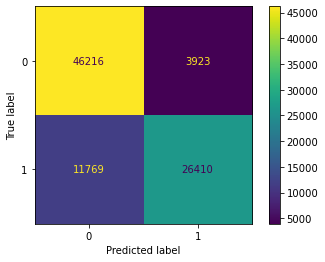

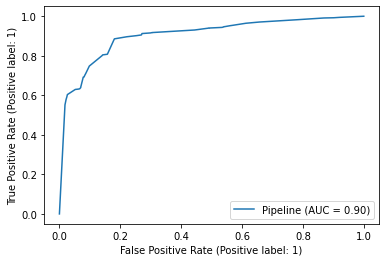

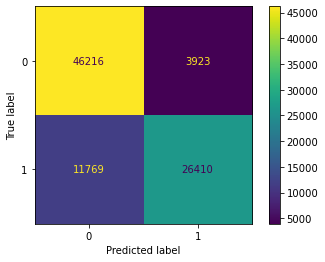

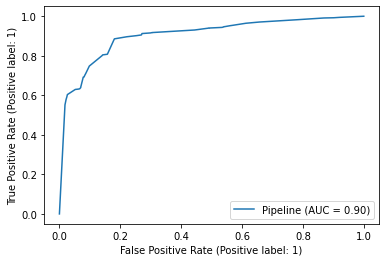

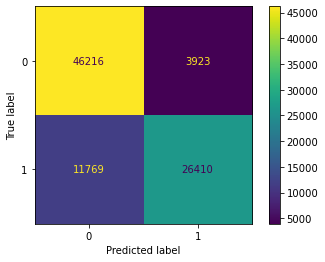

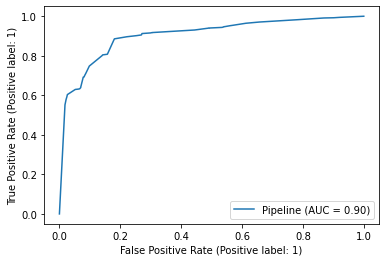

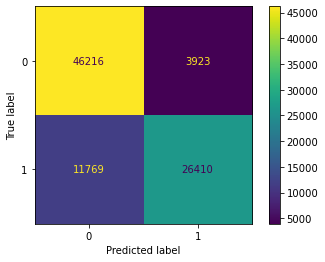

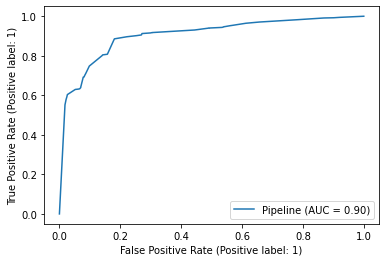

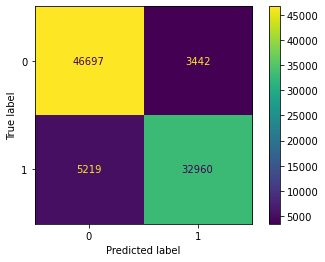

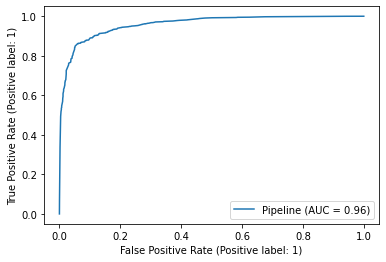

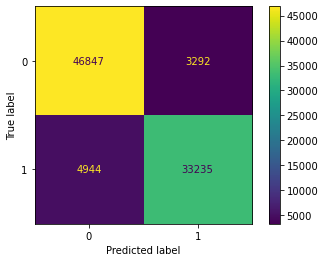

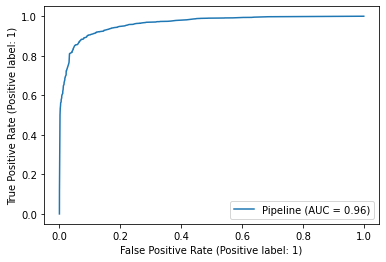

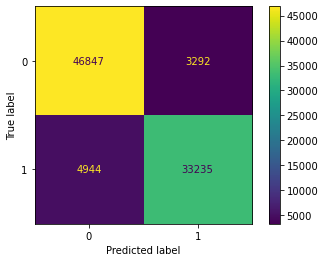

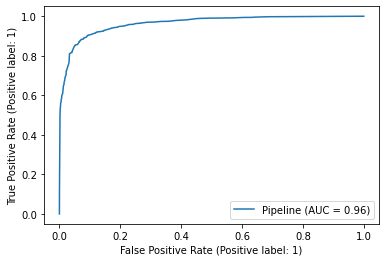

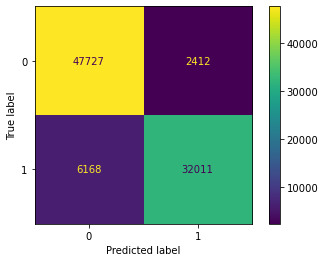

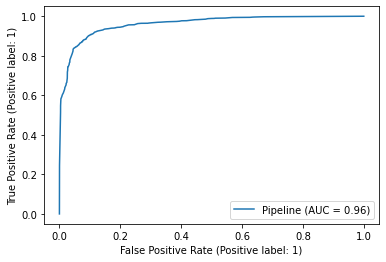

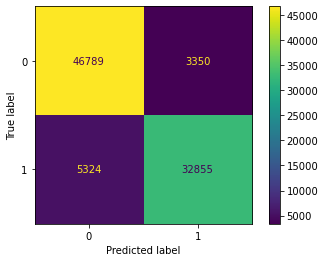

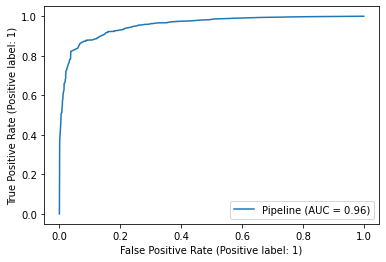

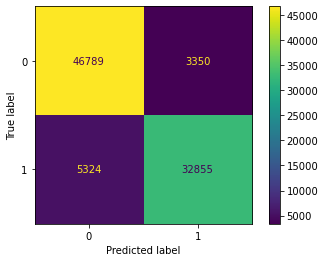

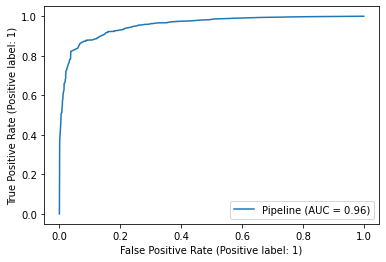

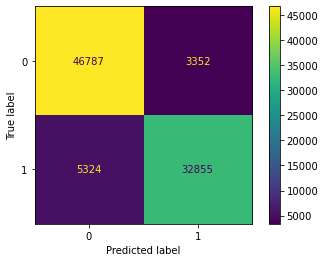

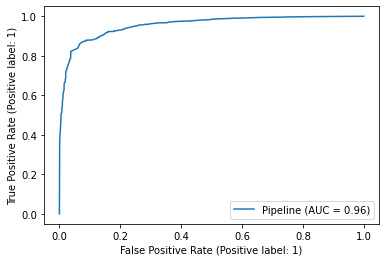

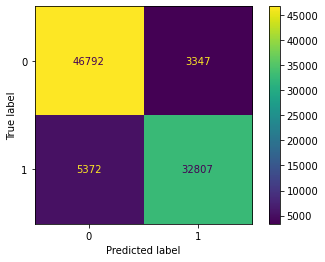

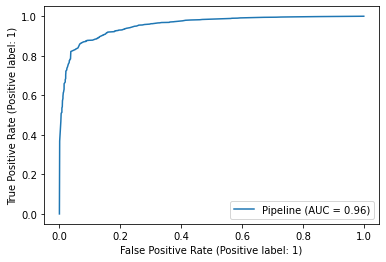

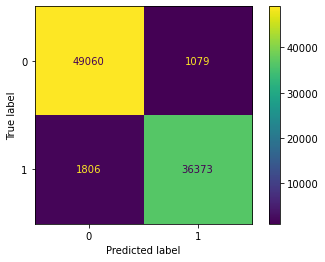

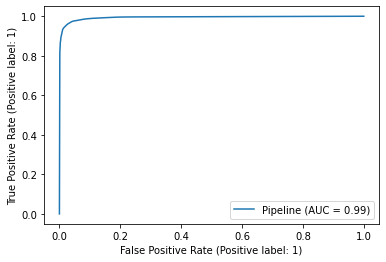

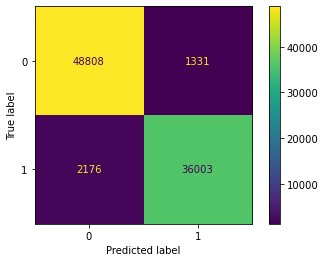

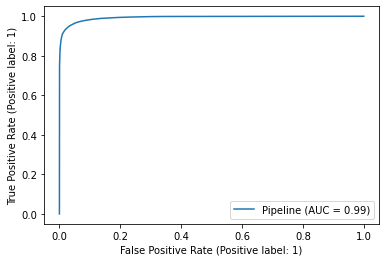

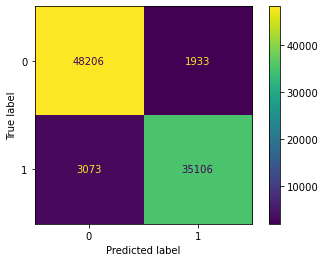

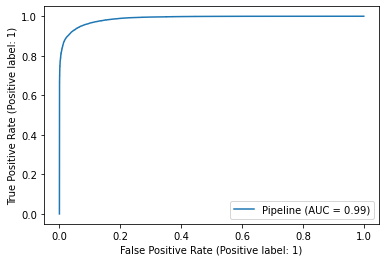

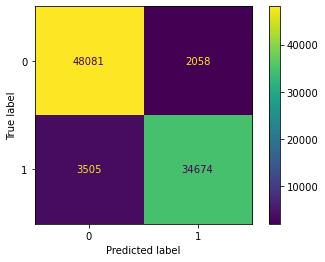

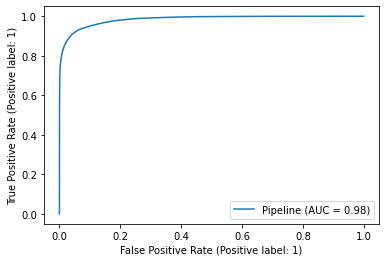

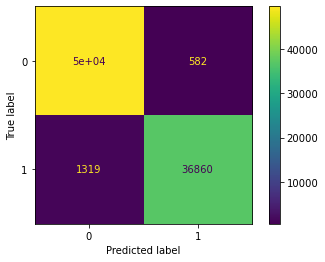

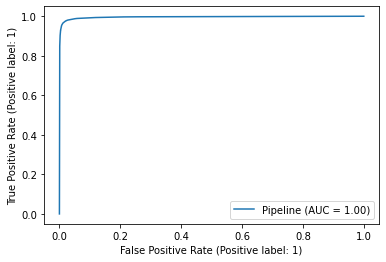

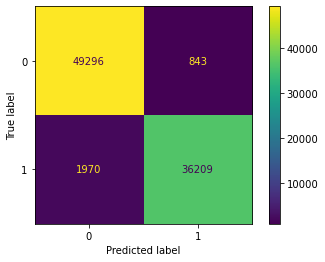

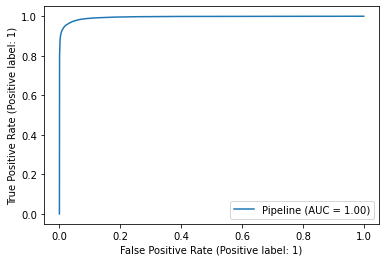

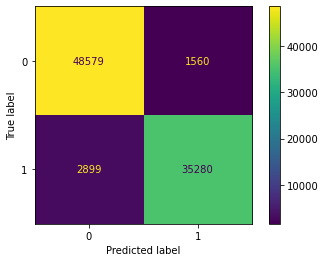

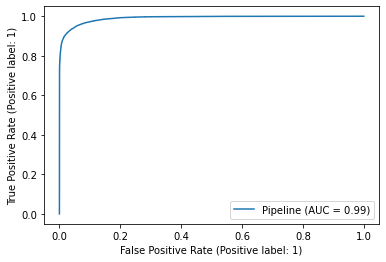

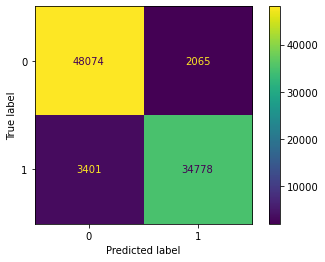

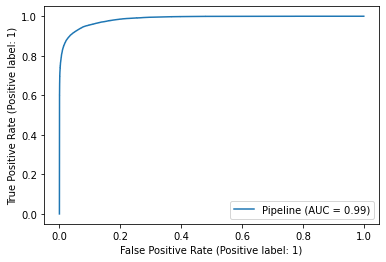

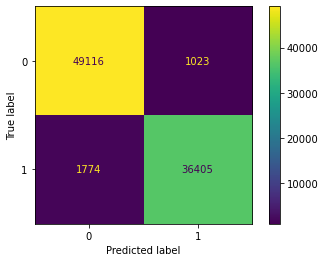

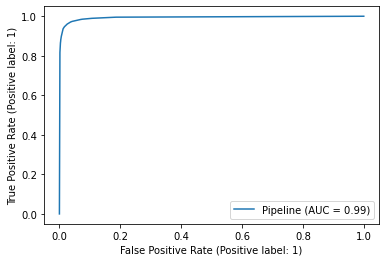

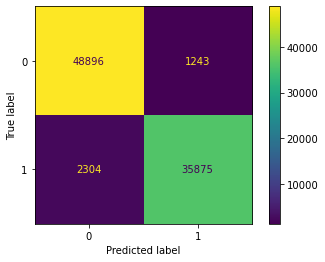

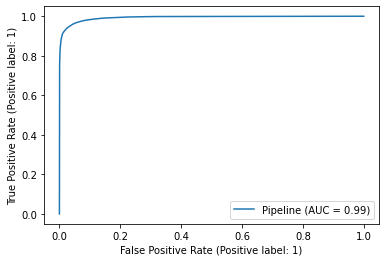

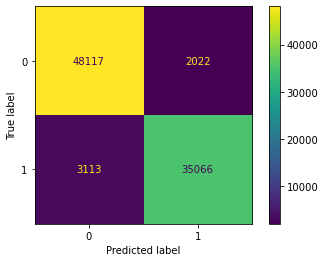

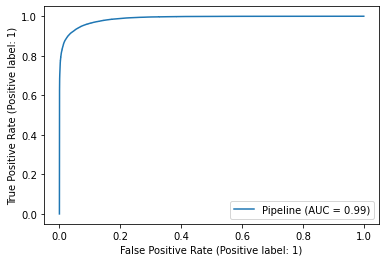

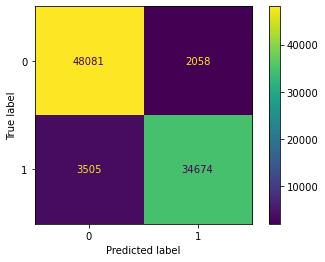

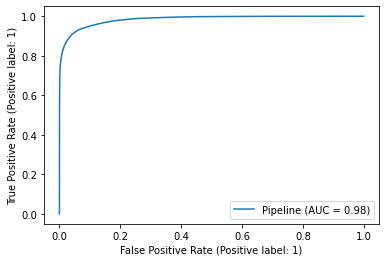

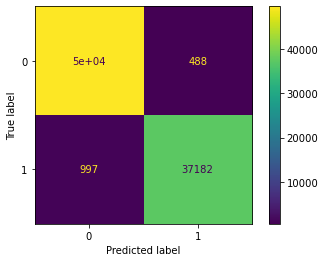

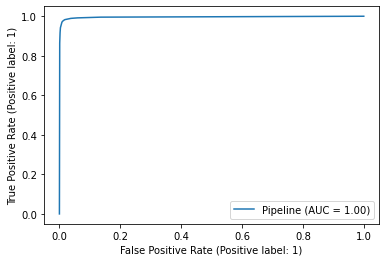

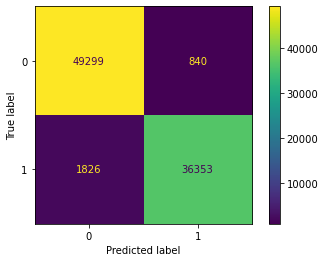

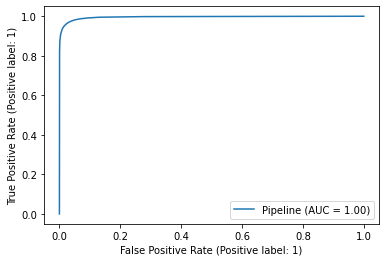

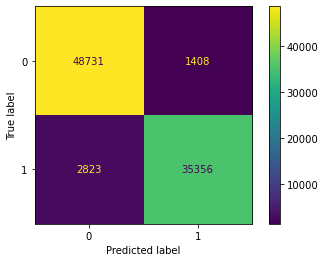

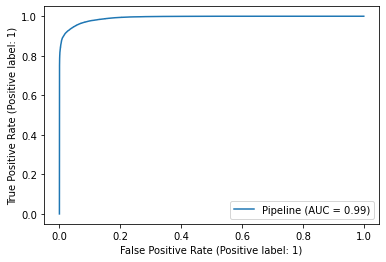

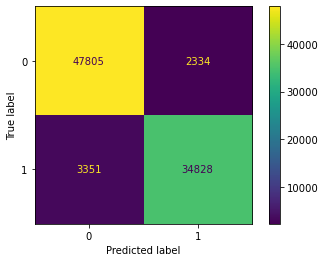

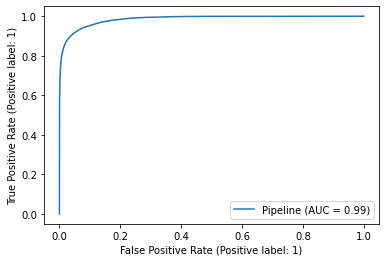

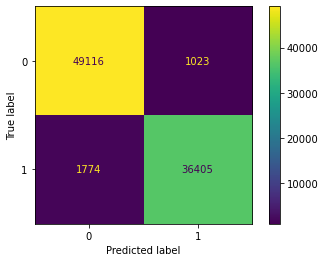

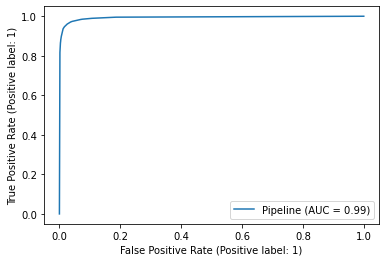

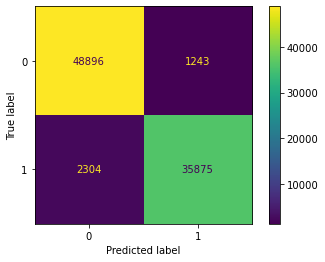

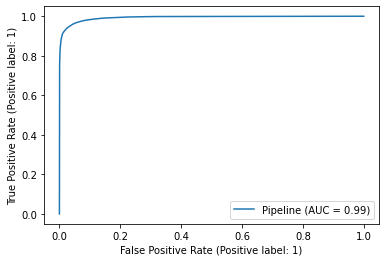

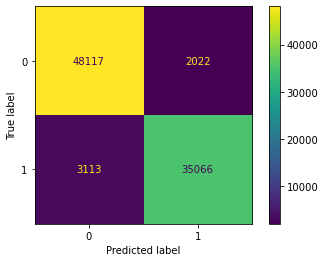

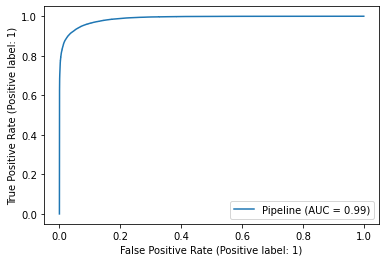

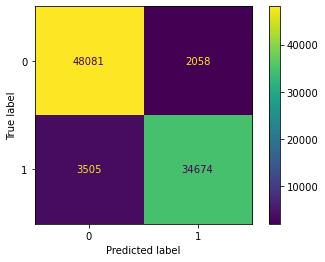

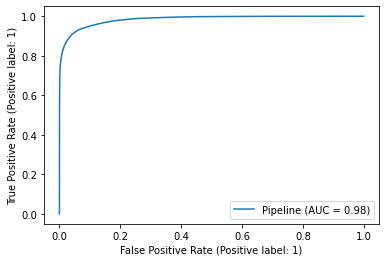

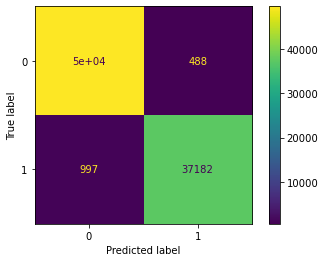

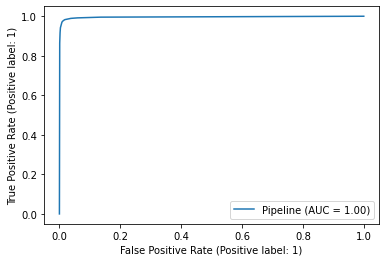

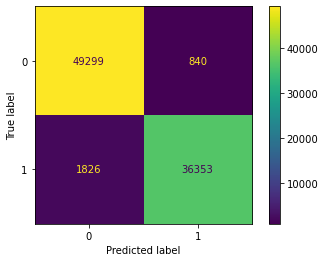

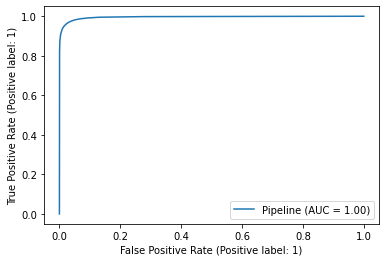

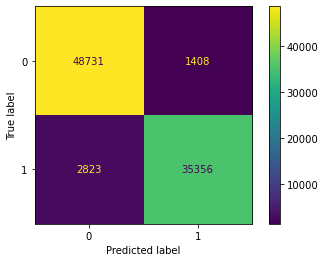

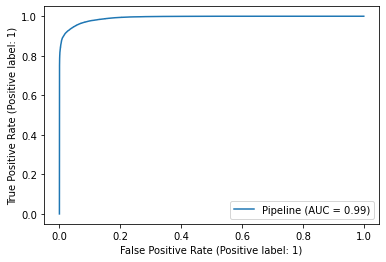

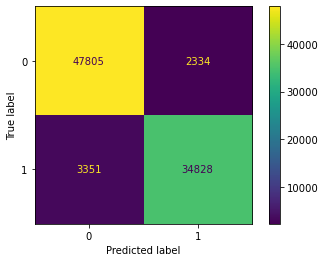

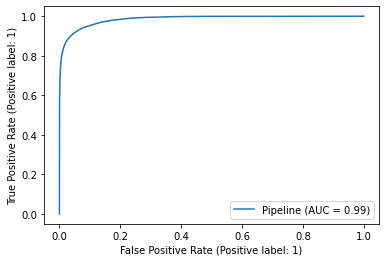

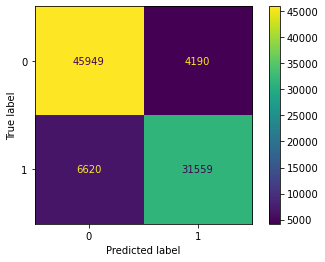

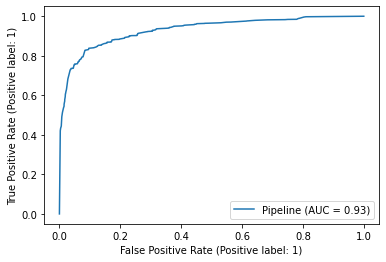

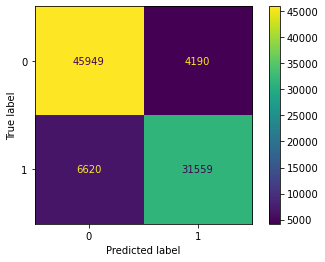

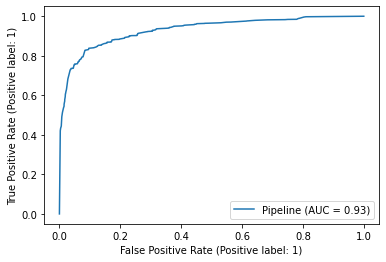

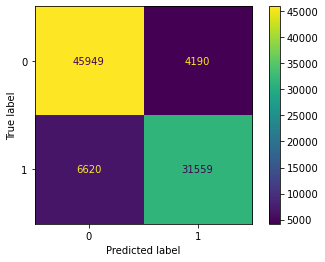

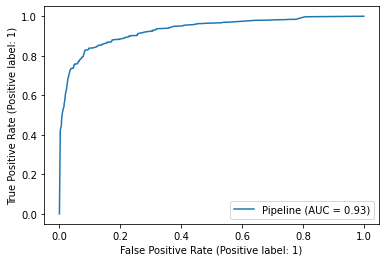

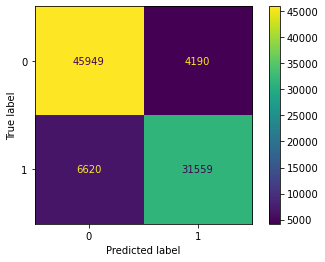

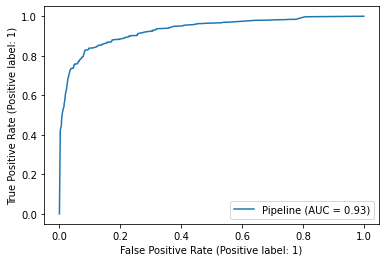

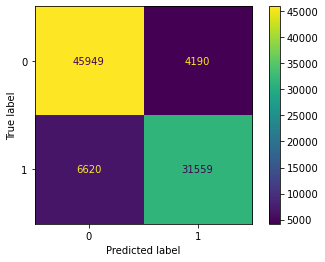

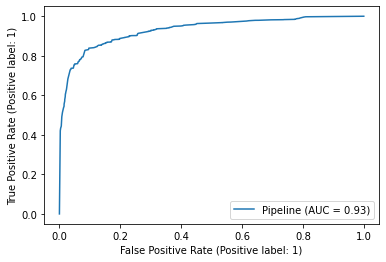

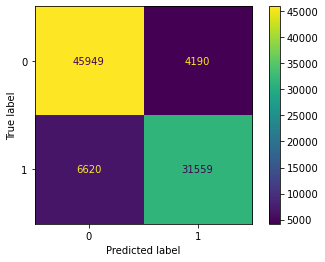

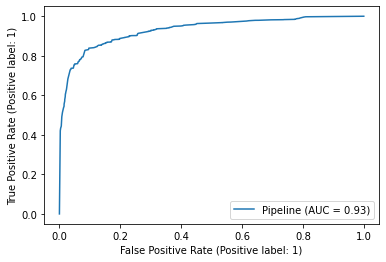

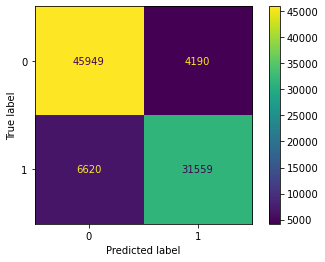

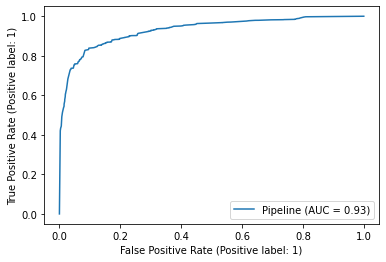

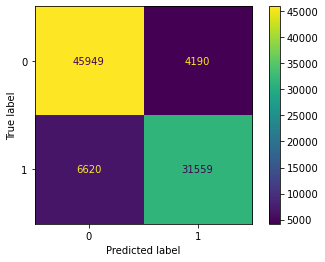

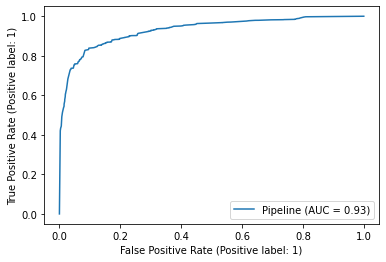

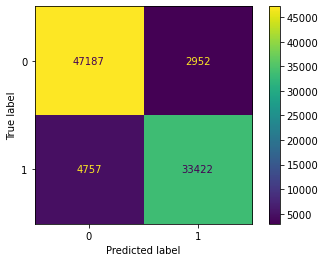

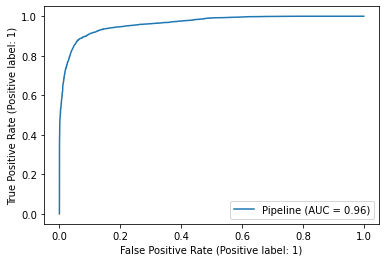

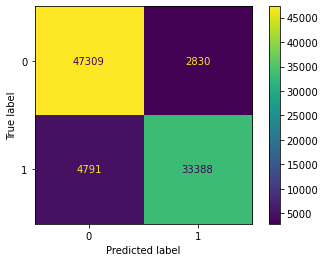

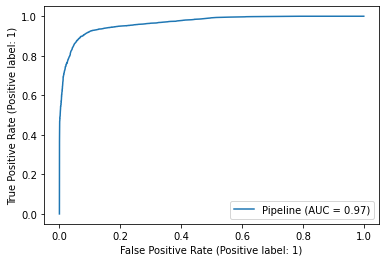

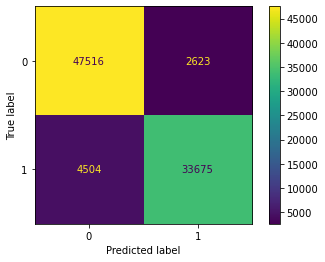

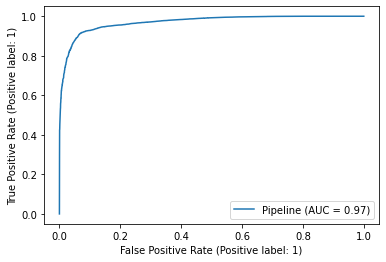

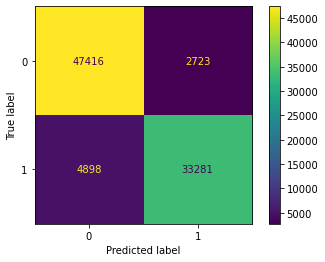

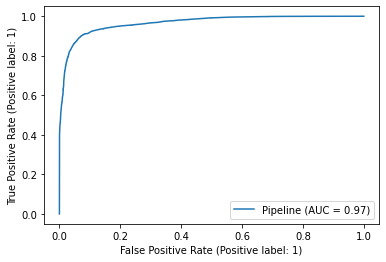

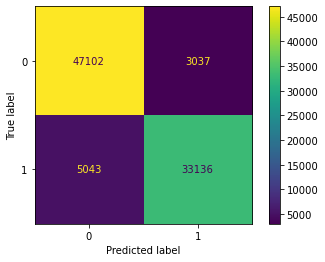

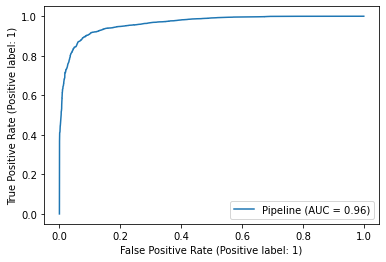

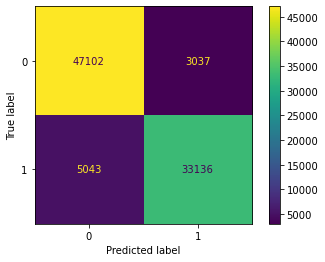

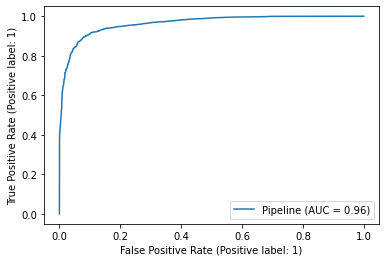

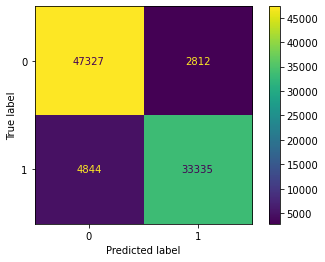

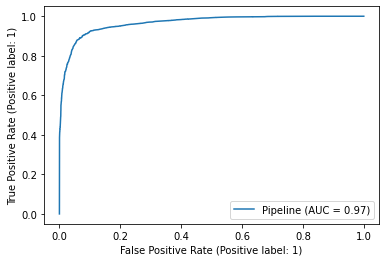

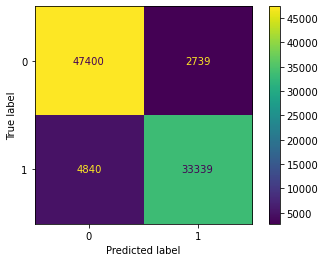

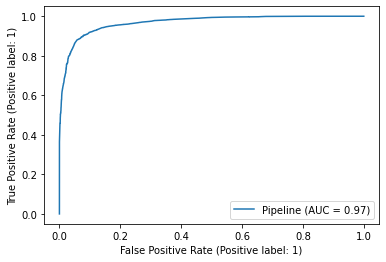

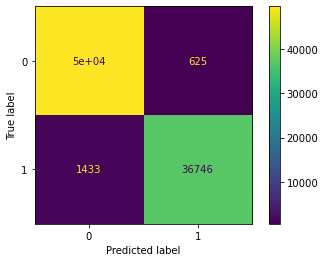

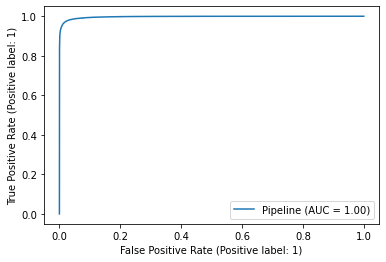

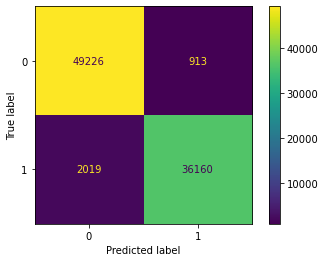

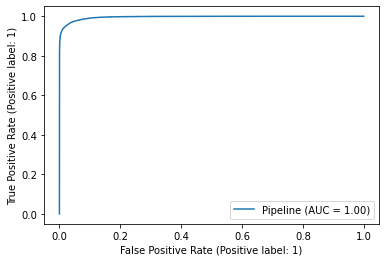

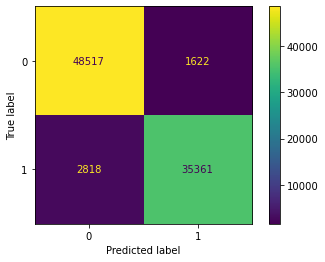

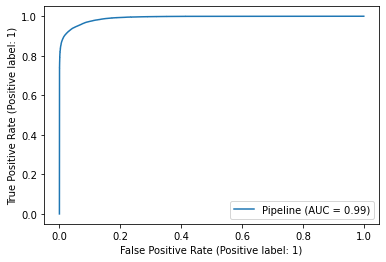

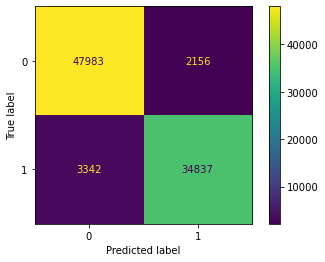

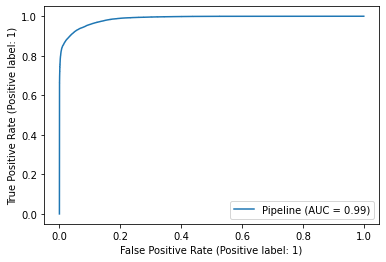

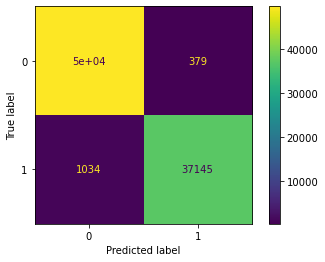

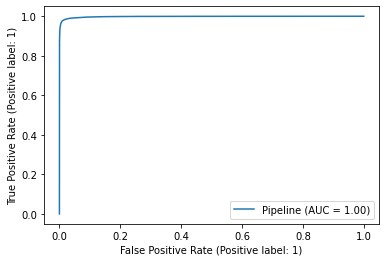

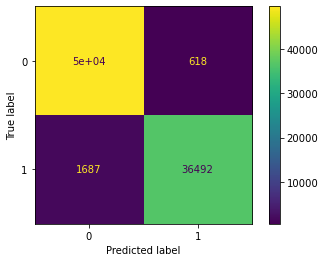

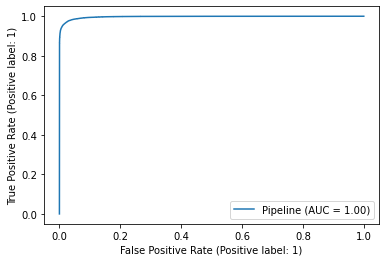

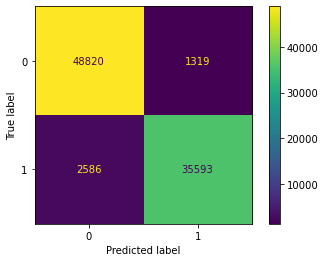

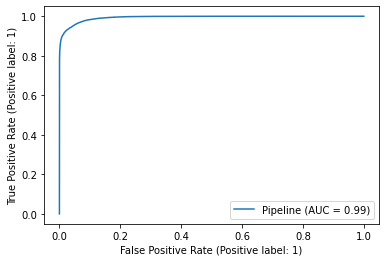

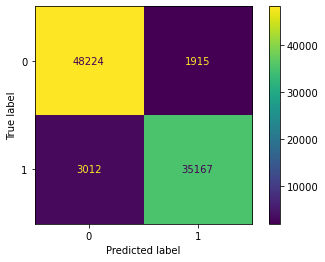

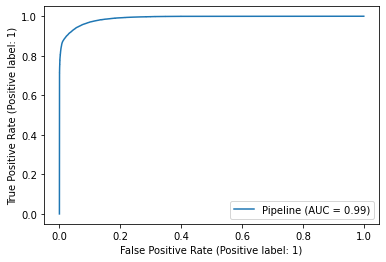

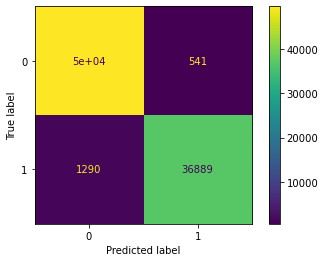

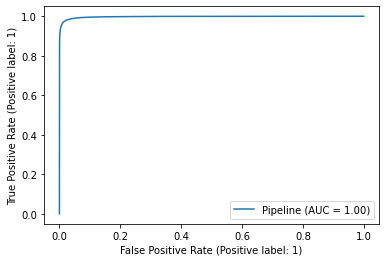

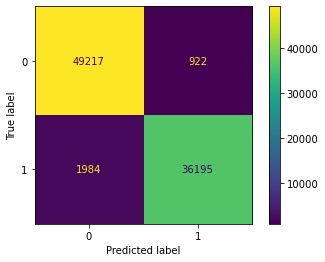

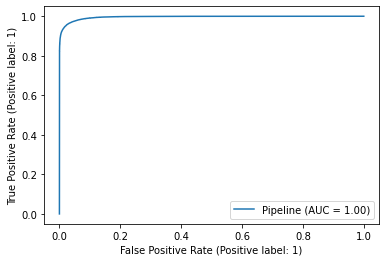

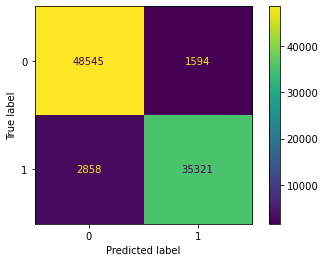

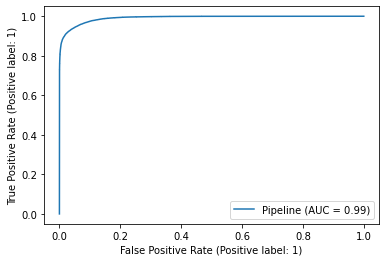

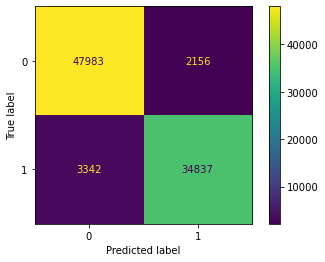

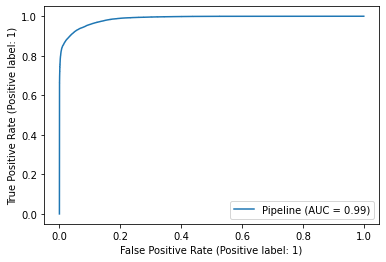

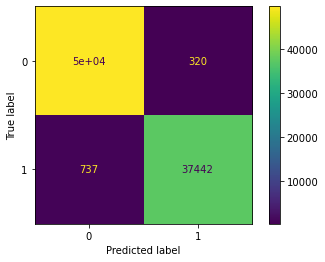

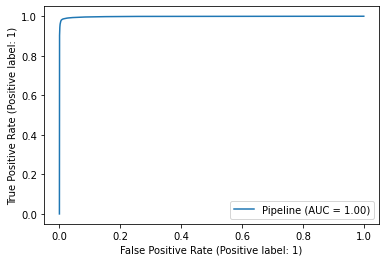

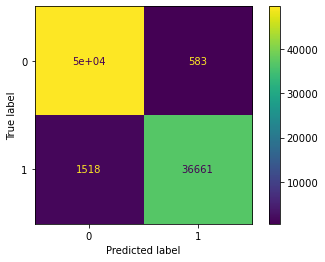

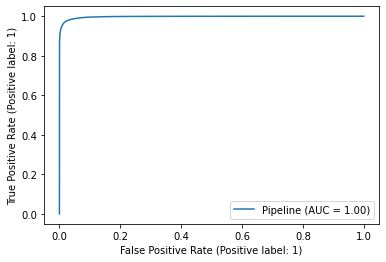

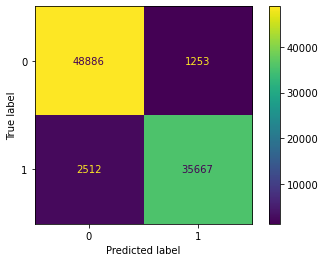

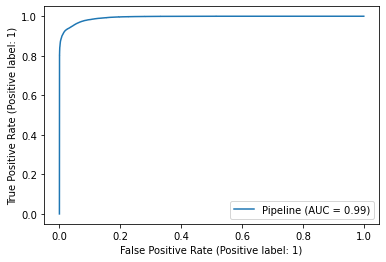

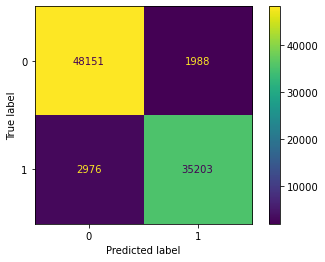

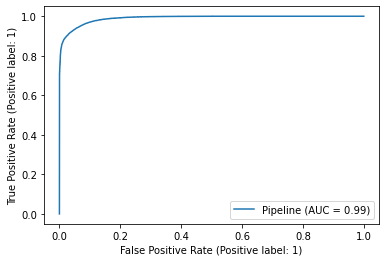

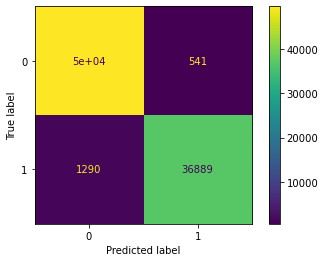

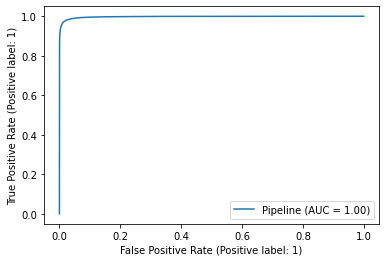

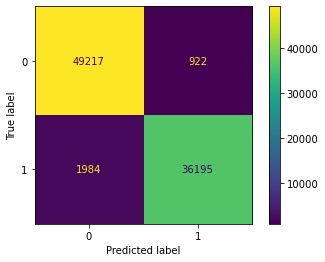

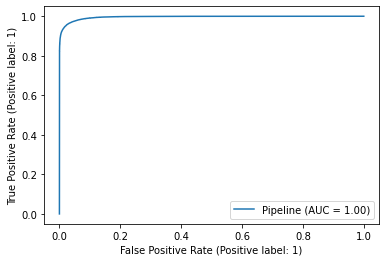

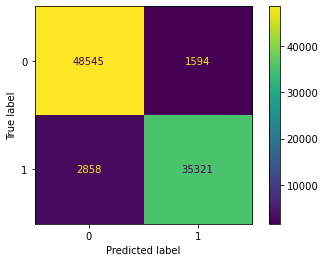

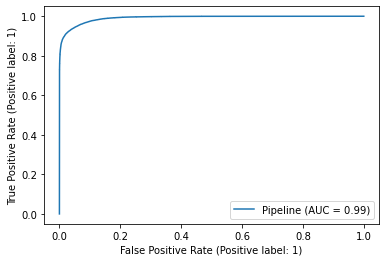

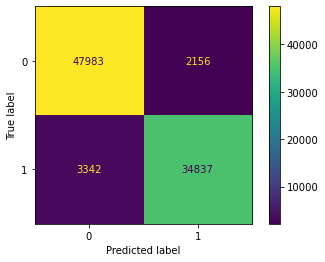

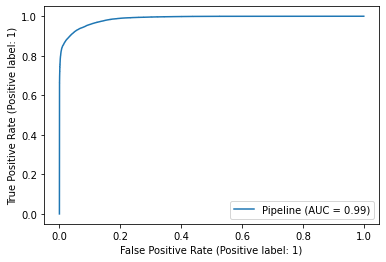

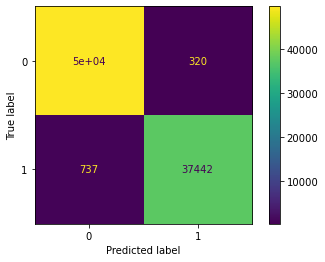

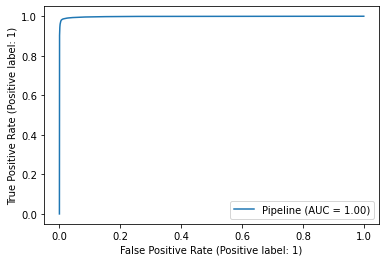

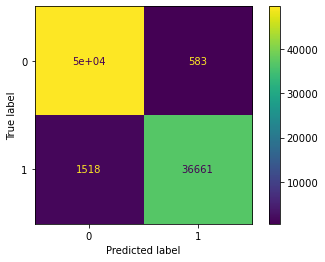

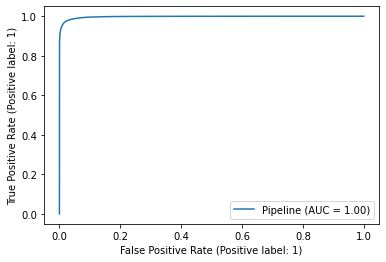

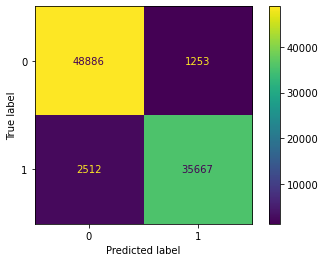

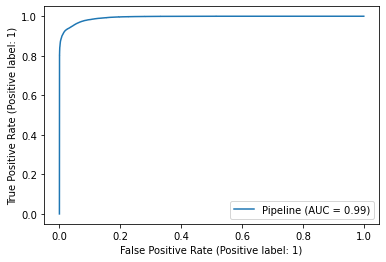

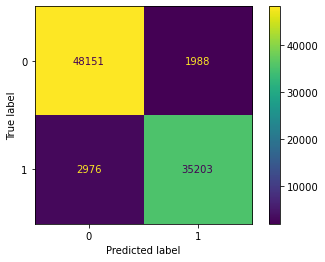

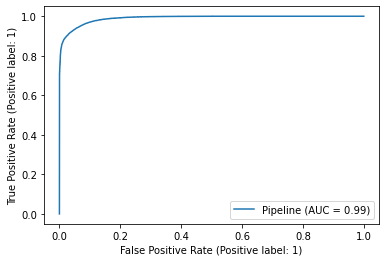

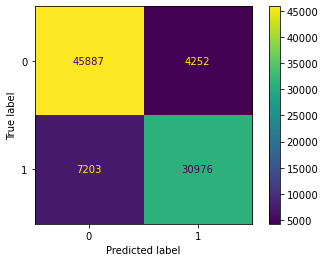

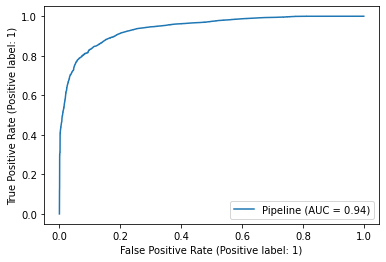

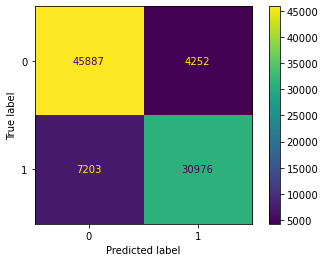

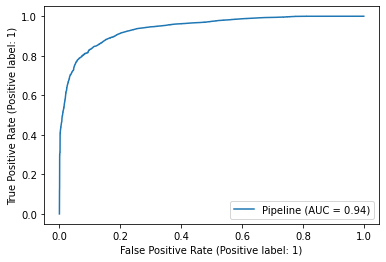

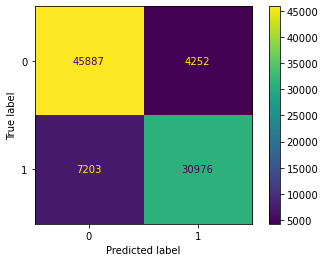

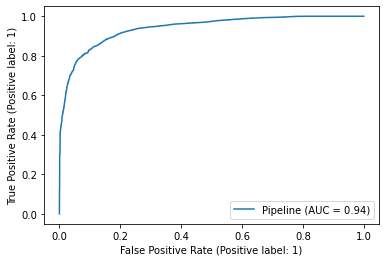

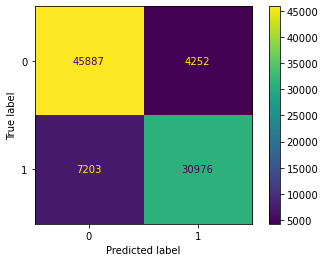

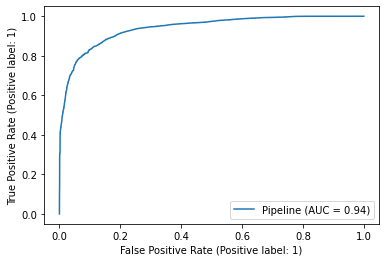

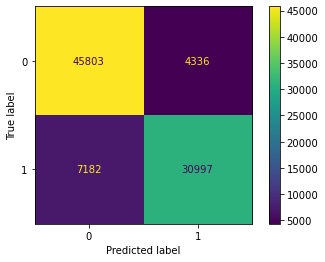

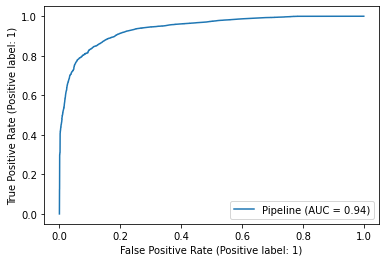

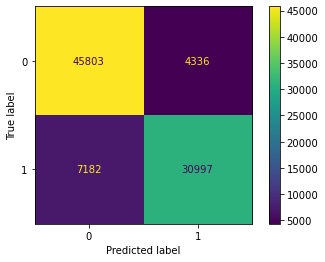

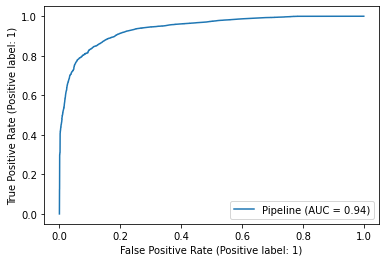

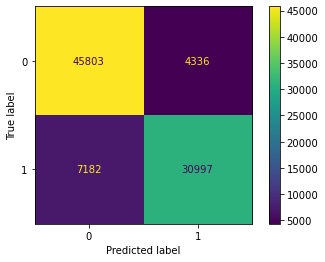

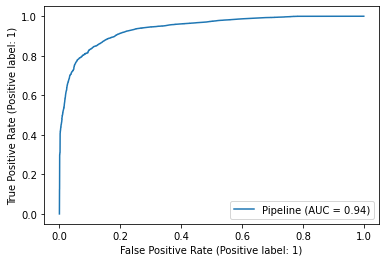

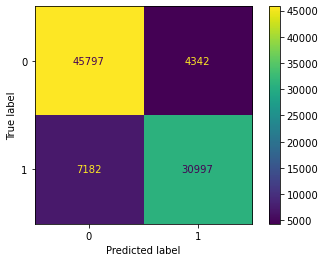

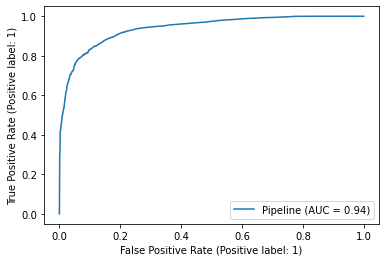

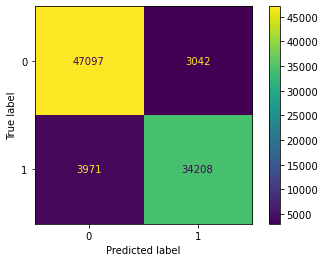

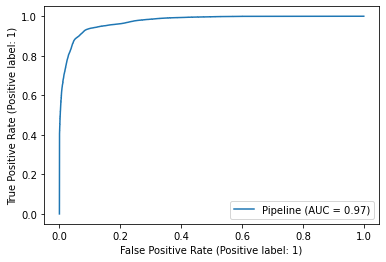

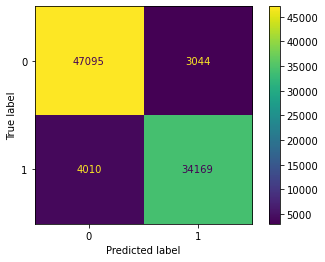

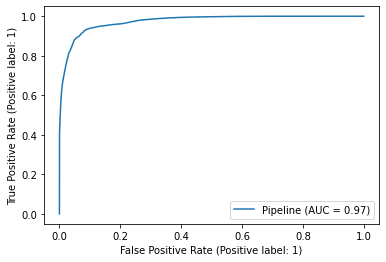

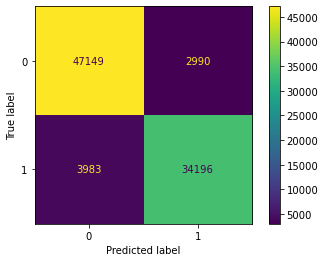

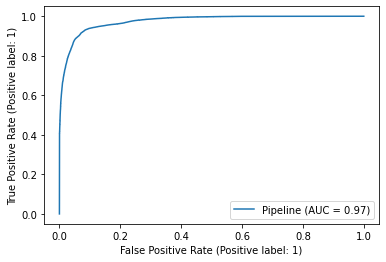

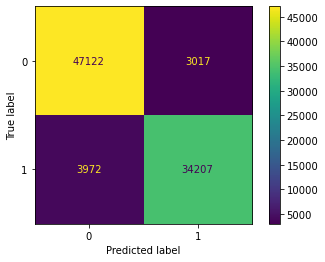

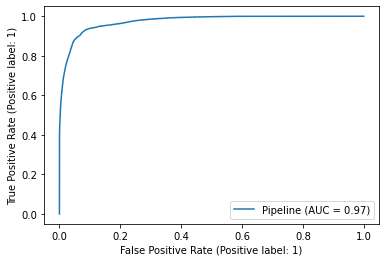

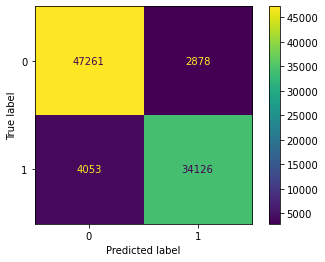

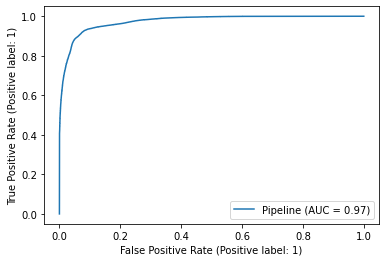

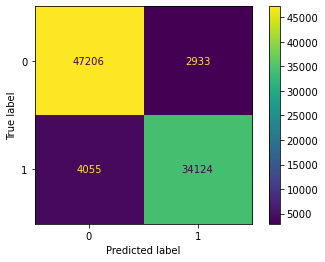

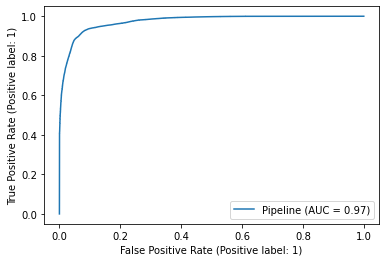

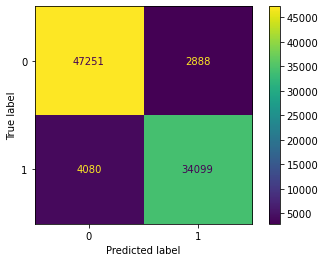

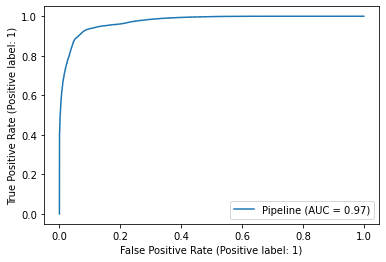

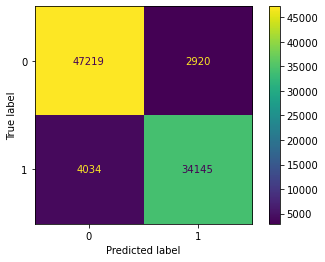

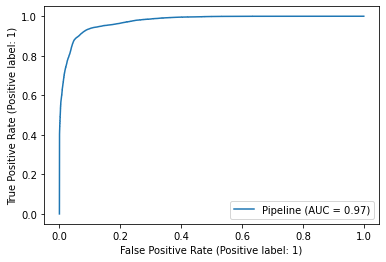

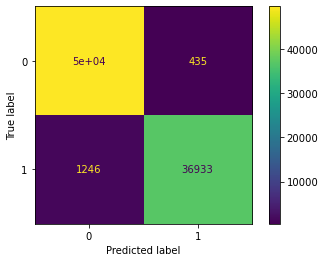

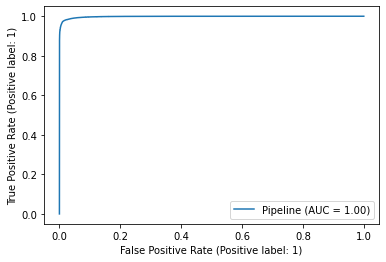

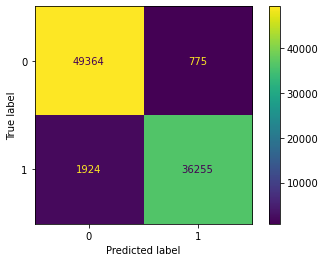

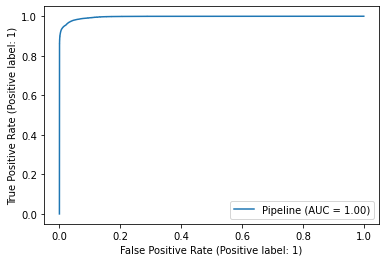

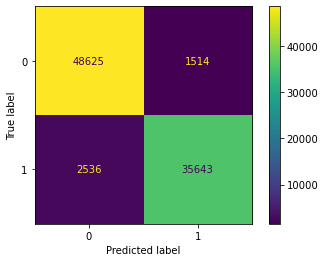

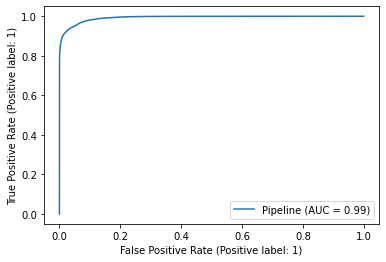

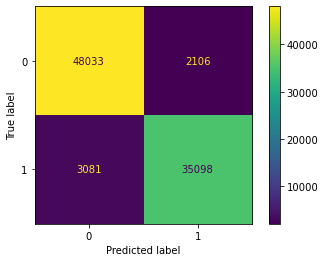

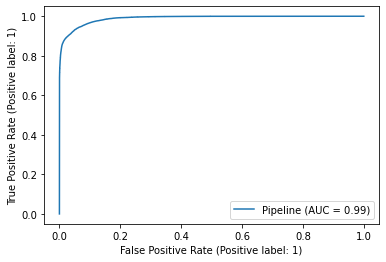

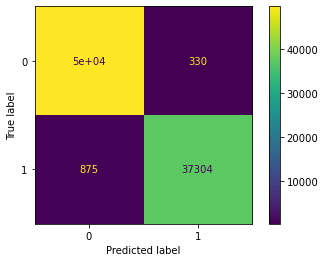

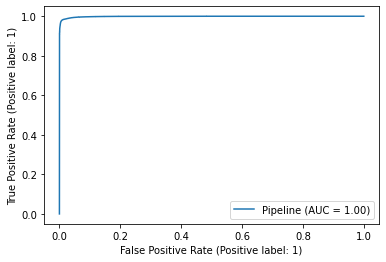

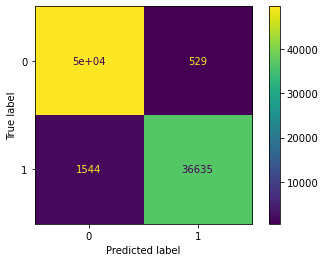

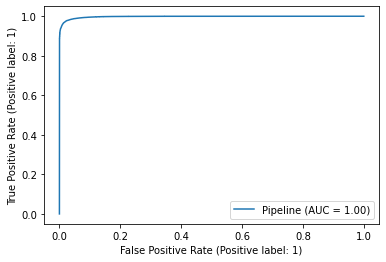

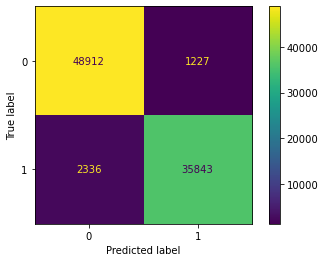

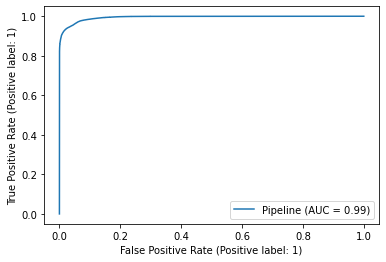

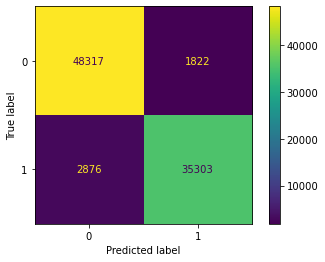

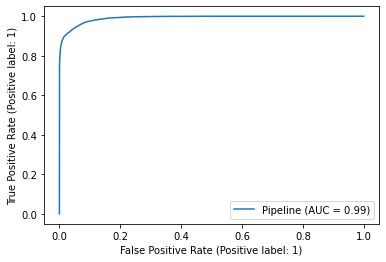

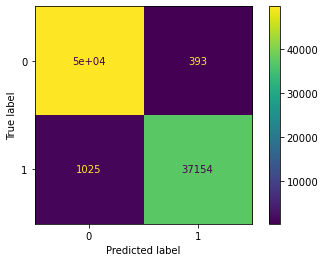

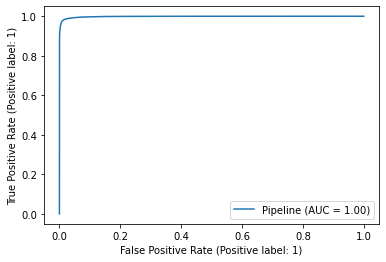

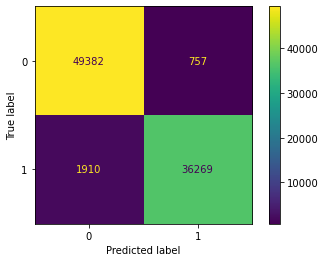

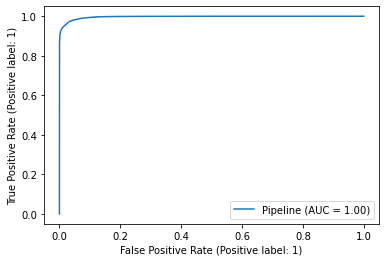

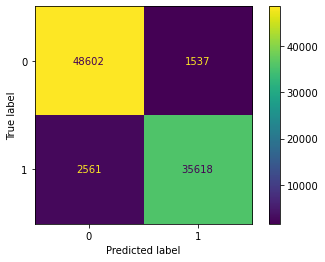

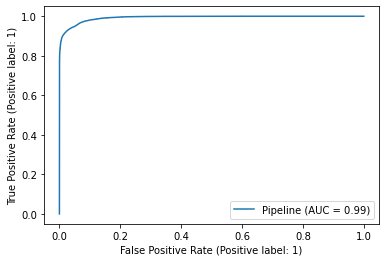

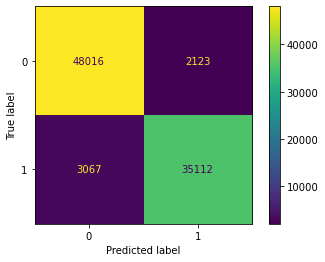

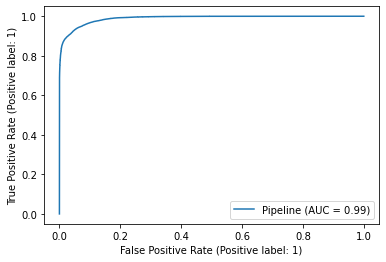

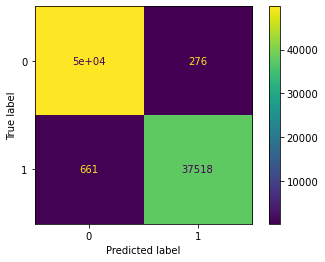

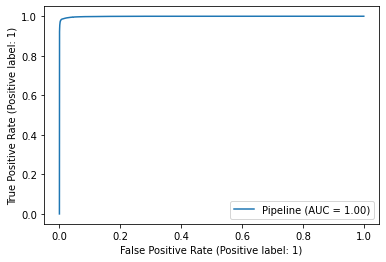

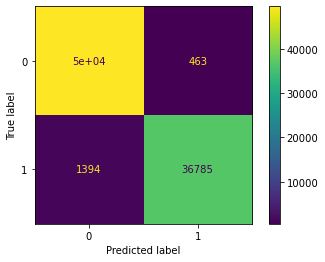

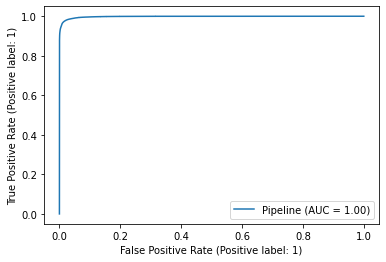

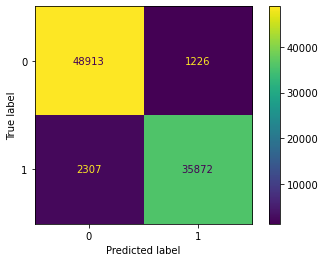

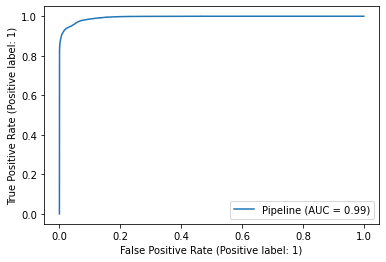

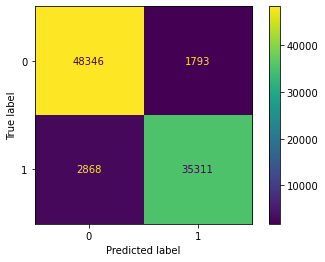

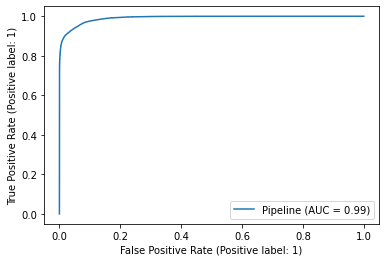

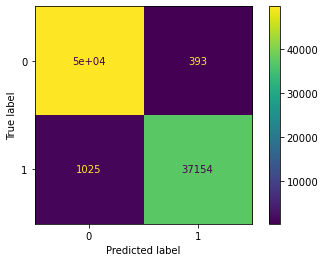

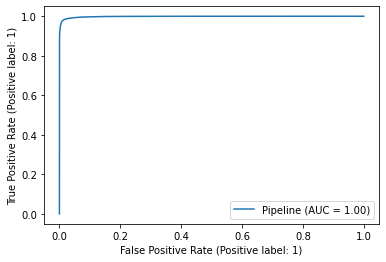

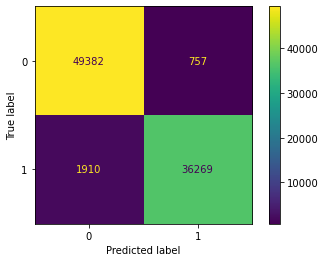

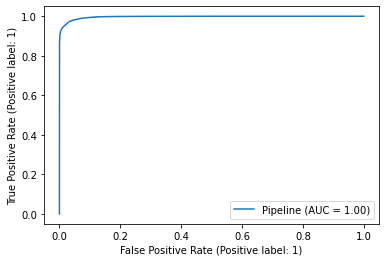

In [41]:
for n_estimator in lst_random_forest__n_estimators:
    for depth in lst_random_forest__max_depth:
        for bootstrap_var in lst_random_forest__bootstrap:
            for samples_leaf in lst_random_forest__min_samples_leaf:
                train_model_RandomForest(n_estimators = n_estimator,
                                         max_depth = depth,
                                         bootstrap = bootstrap_var,
                                         min_samples_leaf = samples_leaf)

# Lendo os experimentos

In [42]:
from mlflow.tracking import MlflowClient


EXPERIMENT_NAME = "RF_model_pipeline_borabusao_"

client = MlflowClient()

# pegando o id do experimento
EXPERIMENT_ID = client.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

In [43]:
#coletando ids dos experimentos
ALL_RUNS_INFO = client.list_run_infos(EXPERIMENT_ID)
ALL_RUNS_ID = [run.run_id for run in ALL_RUNS_INFO]


#coletando informações dos experimentos
ALL_PARAM = [client.get_run(run_id).data.params for run_id in ALL_RUNS_ID]
ALL_METRIC = [client.get_run(run_id).data.metrics for run_id in ALL_RUNS_ID]

In [44]:
client.get_run(ALL_RUNS_ID[0]).data.params.keys()

dict_keys(['bootstrap', 'max_depth', 'n_estimators', 'random_forest__min_samples_leaf'])

In [45]:
df = pd.DataFrame({"Run ID": ALL_RUNS_ID, "Params": ALL_PARAM, "Metrics": ALL_METRIC})

In [46]:
def ret_value(value, key):
    return value[key]

In [47]:
# retirando valores nulos
df['len_params'] = df['Params'].apply(len)
df = df[df['len_params'] == df['len_params'].max()]

In [48]:
#parametros
for params in client.get_run(ALL_RUNS_ID[0]).data.params.keys():
    df[f'params_{params}']=df['Params'].apply(ret_value, key = params)
    #print(params)
#metricas
for metrics in client.get_run(ALL_RUNS_ID[0]).data.metrics.keys():
    df[f'metrics_{metrics}']=df['Metrics'].apply(ret_value, key = metrics)


In [49]:
df.head()

,Run ID,Params,Metrics,len_params,params_bootstrap,params_max_depth,params_n_estimators,params_random_forest__min_samples_leaf,metrics_precision_train,metrics_acuracia_balanceada_val,metrics_f1_val,metrics_recall_val,metrics_auc_score_val,metrics_acuracia_val,metrics_acuracia_balanceada_train,metrics_recall_train,metrics_acuracia_train,metrics_f1_train,metrics_precision_val,metrics_auc_score_train
0,ac00de7d9eae43a39d9b1d2ce90bb472,"{'bootstrap': 'True', 'max_depth': '100', 'n_e...","{'precision_train': 0.9740047974691626, 'acura...",4,True,100,100,5,0.974005,0.967437,0.969742,0.969802,0.967437,0.969802,0.971356,0.973758,0.973758,0.973703,0.970022,0.971356
1,76fd7fec60a54d54881c2bc3b55b9d4d,"{'bootstrap': 'True', 'max_depth': '100', 'n_e...","{'precision_train': 0.9930712496726241, 'acura...",4,True,100,100,2,0.993071,0.982657,0.983928,0.983944,0.982657,0.983944,0.992258,0.993038,0.993038,0.993034,0.984014,0.992258
2,7056f3cc79924294919da1f61fb17ad7,"{'bootstrap': 'False', 'max_depth': '50', 'n_e...","{'precision_train': 0.9481131443860747, 'acura...",4,False,50,100,50,0.948113,0.944560,0.947128,0.947225,0.944560,0.947225,0.945326,0.948029,0.948029,0.947933,0.947318,0.945326
3,24cfad567b0c44ddaac9cffc30f42f52,"{'bootstrap': 'False', 'max_depth': '50', 'n_e...","{'precision_train': 0.9619010234638513, 'acura...",4,False,50,100,20,0.961901,0.957561,0.959923,0.959997,0.957561,0.959997,0.959235,0.961743,0.961743,0.961670,0.960144,0.959235
4,a4618cc8408b400a8fdff7e0987be631,"{'bootstrap': 'False', 'max_depth': '50', 'n_e...","{'precision_train': 0.9856737631921374, 'acura...",4,False,50,100,5,0.985674,0.977127,0.978941,0.978974,0.977127,0.978974,0.983982,0.985547,0.985547,0.985528,0.979130,0.983982


In [50]:
# Os parâmetros retornam como object, convertendo os que são números para int
df['params_max_depth'] =df['params_max_depth'].astype(int)
df['params_n_estimators'] =df['params_n_estimators'].astype(int)
df['params_random_forest__min_samples_leaf'] = df['params_random_forest__min_samples_leaf'].astype(int)

# Selecionando o melhor experimento:

In [52]:
# Top 1 com melhor acuracia balanceada 
best_run_id = df.sort_values('metrics_acuracia_balanceada_val', ascending = False)['Run ID'].head(1).values[0]

In [53]:
best_run = client.get_run(run_id = best_run_id)
best_run

<Run: data=<RunData: metrics={'acuracia_balanceada_train': 0.9997951430274136,
 'acuracia_balanceada_val': 0.9885910602089145,
 'acuracia_train': 0.9998235539443714,
 'acuracia_val': 0.9893906112004348,
 'auc_score_train': 0.9997951430274136,
 'auc_score_val': 0.9885910602089145,
 'f1_train': 0.9998235495361146,
 'f1_val': 0.9893840177454782,
 'precision_train': 0.9998236086100976,
 'precision_val': 0.9894158082809862,
 'recall_train': 0.9998235539443714,
 'recall_val': 0.9893906112004348}, params={'bootstrap': 'False',
 'max_depth': '50',
 'n_estimators': '100',
 'random_forest__min_samples_leaf': '2'}, tags={'mlflow.log-model.history': '[{"run_id": "e5d85287296143d4b0770969f1b67097", '
                             '"artifact_path": "random-forest-model-pipeline", '
                             '"utc_time_created": "2022-09-22 '
                             '19:29:48.930449", "flavors": {"python_function": '
                             '{"model_path": "model.pkl", "loader_module": '


In [54]:
model_name = 'random-forest-model-pipeline'

In [55]:
path = '/'+best_run.info.artifact_uri.split('///')[1] + f'/{model_name}/model.pkl'
path

'/Users/gabrielvarizo/Desktop/Gabriel-Desafio_borabusao/mlruns/1/e5d85287296143d4b0770969f1b67097/artifacts/random-forest-model-pipeline/model.pkl'

In [87]:
mlflow.artifacts.download_artifacts(artifact_uri= best_run.info.artifact_uri + '/confusionrf.png', dst_path='/Users/gabrielvarizo/Desktop/Gabriel-Desafio_borabusao')
mlflow.artifacts.download_artifacts(artifact_uri= best_run.info.artifact_uri + '/rocrf.png', dst_path='/Users/gabrielvarizo/Desktop/Gabriel-Desafio_borabusao')

'/Users/gabrielvarizo/Desktop/Gabriel-Desafio_borabusao/rocrf.png'

# Salvando o modelo final

## Carregando do mlflow

In [66]:
X_test.head()

,ID,Genero,PlanoFidelidade,Idade,RazaoViagem,CategoriaPassagem,DistanciaKm,WiFi,ConvenienciaHorarios,FacilidadeReservaViaApp,PontosLocalizacao,Alimentacao,CheckInViaApp,ConfortoInterno,Entretenimento,ServicosIntegracao,SalaDeEspera,Bagagem,ServicoCheckIn,ServicoDeBordo,Limpeza&Higiene,AtrasoNaSaida,AtrasoNaChegada
80638,98687,Feminino,Sim,26,TurismoOuPessoal,Normal,538.0,2,4,2,5,5,2,5,5,5,4,4,3,5,5,0,0.0
43398,80734,Masculino,Sim,22,NegociosOuTrabalho,Leito,246.0,3,5,5,5,3,3,3,3,1,1,3,2,3,3,0,16.0
32751,5711,Feminino,Sim,59,TurismoOuPessoal,Normal,122.0,1,3,1,3,2,3,3,4,4,1,4,3,4,4,37,34.0
33571,23035,Feminino,Sim,32,TurismoOuPessoal,Normal,638.0,2,3,2,4,4,2,4,4,3,2,4,1,4,4,27,4.0
71287,53962,Masculino,Nao,35,NegociosOuTrabalho,Leito,698.0,2,2,2,1,2,2,5,2,2,2,3,2,2,2,0,0.0


In [59]:
# Selecionando o modelo com melhor resultado
logged_model = f'runs:/{best_run_id}/{model_name}'
# Carreganndo o modelo
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Testando as inferências
predictions_test = loaded_model.predict(X_test)
predictions_test

array([0, 0, 0, ..., 1, 1, 1])

In [71]:
acuracia_test = accuracy_score(y_test, predictions_test)
roc_auc_test = roc_auc_score(y_test, predictions_test, average = 'weighted')
b_acuracia_test = balanced_accuracy_score(y_test, predictions_test)
ks_test = ks_2samp(y_test, predictions_test)

print('Performance do modelo final: \n')
print(f'Acurácia de teste: {round(acuracia_test*100, 2)}%')
print(f'Acurácia balanceada de teste: {round(b_acuracia_test*100, 2)}%')
print(f'ROC_AUC de teste: {round(roc_auc_test*100, 2)}%')
print(f'KS de teste: {ks_test}')
print('-----------------------------------')
print(classification_report(y_test, predictions_test))

Performance do modelo final: 

Acurácia de teste: 96.48%
Acurácia balanceada de teste: 96.25%
ROC_AUC de teste: 96.25%
KS de teste: KstestResult(statistic=0.014307712049274945, pvalue=0.08150154508305363)
-----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8740
           1       0.98      0.94      0.96      6846

    accuracy                           0.96     15586
   macro avg       0.97      0.96      0.96     15586
weighted avg       0.97      0.96      0.96     15586



## Carregando com o joblib

In [63]:
import joblib

#carregando com joblib
loaded_pipeline = joblib.load(path)
#testando inferencias
loaded_pipeline.predict(X_val)

array([0, 1, 0, ..., 0, 1, 0])

## Salvando com o joblib

In [64]:
joblib.dump(loaded_pipeline, 'model.joblib')

['model.joblib']

In [73]:
test_model = joblib.load('model.joblib')
predictions_joblib = test_model.predict(X_test)
predictions_joblib

array([0, 0, 0, ..., 1, 1, 1])

In [74]:
acuracia_test = accuracy_score(y_test, predictions_joblib)
roc_auc_test = roc_auc_score(y_test, predictions_joblib, average = 'weighted')
b_acuracia_test = balanced_accuracy_score(y_test, predictions_joblib)
ks_test = ks_2samp(y_test, predictions_joblib)

print('Performance do modelo final: \n')
print(f'Acurácia de teste: {round(acuracia_test*100, 2)}%')
print(f'Acurácia balanceada de teste: {round(b_acuracia_test*100, 2)}%')
print(f'ROC_AUC de teste: {round(roc_auc_test*100, 2)}%')
print(f'KS de teste: {ks_test}')
print('-----------------------------------')
print(classification_report(y_test, predictions_test))

Performance do modelo final: 

Acurácia de teste: 96.48%
Acurácia balanceada de teste: 96.25%
ROC_AUC de teste: 96.25%
KS de teste: KstestResult(statistic=0.014307712049274945, pvalue=0.08150154508305363)
-----------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8740
           1       0.98      0.94      0.96      6846

    accuracy                           0.96     15586
   macro avg       0.97      0.96      0.96     15586
weighted avg       0.97      0.96      0.96     15586



# Análise de viés e variância

In [76]:
def plt_val_curve(model, X,y, param_name, param_range):
    
    
    train_scores, test_scores = validation_curve(model, #clf
                                                 X, y, #X,y
                                                 param_name=param_name, param_range=param_range ,
                                                 cv = 5,
                                                 scoring="balanced_accuracy")

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.subplots(1, figsize=(10,8))

    plt.plot(param_range, train_mean, label="Training score", color="black")
    plt.plot(param_range, test_mean, label="Test score", color="red")

    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

    plt.title("Validation Curve With Random Forest - {}".format(param_name))
    plt.xlabel("{} - range".format(param_name))
    plt.ylabel("Accuracy Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()


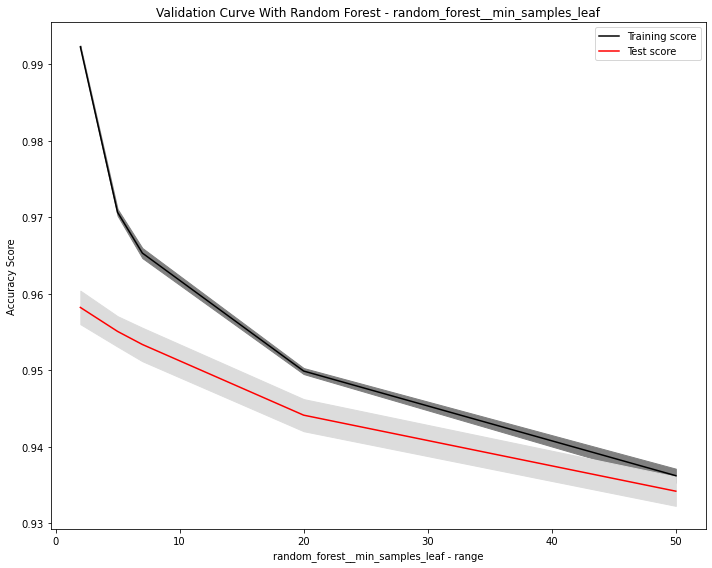

In [79]:
plt_val_curve(RF_clf_pipe, X_train, y_train, param_name = 'random_forest__min_samples_leaf' , param_range=[2,5,7,20,50]) 
    #30 + muito overfiting com baixos valores

O modelo que performou melhor apresentou min_samples_leaf = 2. Talvez fosse melhor escolher um valor um pouco maior para fugir do overfitting.

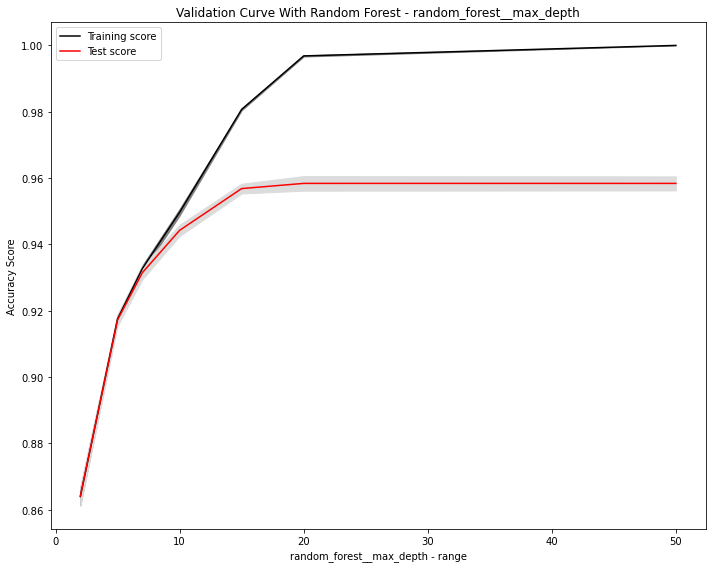

In [80]:
plt_val_curve(RF_clf_pipe, X_train, y_train, param_name = 'random_forest__max_depth' , param_range=[2, 5, 7,10,15, 20 ,50]) #50

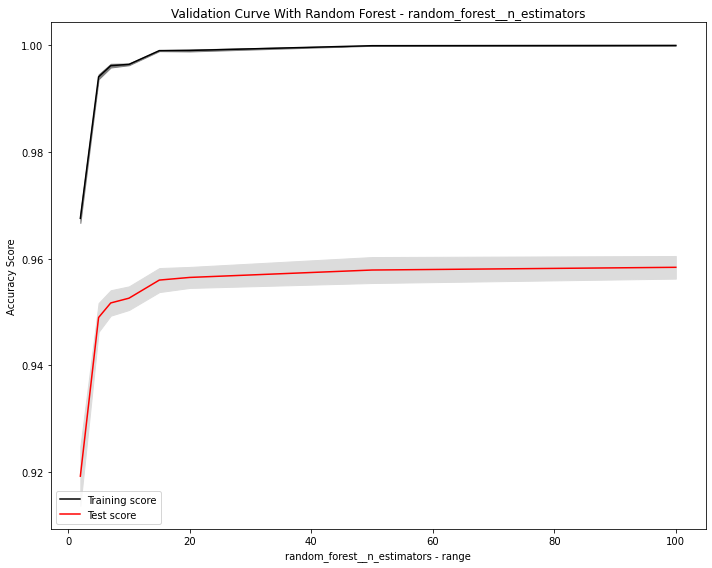

In [81]:
plt_val_curve(RF_clf_pipe, X_train, y_train, param_name = 'random_forest__n_estimators' , param_range=[2, 5, 7,10,15, 20, 50, 100]) 
# 10 faca de occam  "entities should not be multiplied beyond necessity"